Experiments

In [2]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
from mesa.datacollection import DataCollector

from tqdm import tqdm
import pandas as pd
import numpy as np
from social_force_model import CrowdModel, portrayal
import matplotlib.pyplot as plt

# Helper functions

In [3]:
def scaling_factor(fraction, dimension):
    return int(np.sqrt((fraction * dimension**2)/np.pi))

def plot_csv(file_name1, file_name2, label1, label2, title, yaxis_label="Number of Agents"):
    data1 = pd.read_csv(file_name1)
    data2 = pd.read_csv(file_name2)
        
    # get mean of data
    data_mean1 = data1.mean(axis=1)
    data_mean2 = data2.mean(axis=1)
    
    # get std of data
    data_std1 = data1.std(axis=1)
    data_std2 = data2.std(axis=1)
    
    # plot data
    plt.figure()
    plt.plot(data_mean1.index, data_mean1, label=label1)
    plt.fill_between(data_mean1.index, data_mean1 - data_std1, data_mean1 + data_std1, alpha=0.2)
    plt.plot(data_mean2.index, data_mean2, label=label2)
    plt.fill_between(data_mean2.index, data_mean2 - data_std2, data_mean2 + data_std2, alpha=0.2)
    plt.legend()
    plt.axhline(y=(N-4), color='r', linestyle='--')
    
    plt.title(f"{title}")
    plt.xlabel("Steps")
    plt.ylabel(yaxis_label)
    plt.show()
    
    # plot zoomed in part
    plt.figure()
    plt.plot(data_mean1.index, data_mean1, label=label1)
    plt.fill_between(data_mean1.index, data_mean1 - data_std1, data_mean1 + data_std1, alpha=0.2)
    plt.plot(data_mean2.index, data_mean2, label=label2)
    plt.fill_between(data_mean2.index, data_mean2 - data_std2, data_mean2 + data_std2, alpha=0.2)
    plt.legend()
    plt.axhline(y=(N-4), color='r', linestyle='--')
    plt.xlim(0, 20)
    
    plt.title(f"Zoomed: {title}")
    plt.xlabel("Steps")
    plt.ylabel(yaxis_label)
    plt.show()

# Base model params

In [4]:
#Parameters
dimension = 25
width = dimension
height = dimension

N = int(0.25 * dimension * dimension)
fire_radius = scaling_factor((1/7), dimension)
social_radius = scaling_factor((1/35), dimension)
p_spreading = 0.3
p_spreading_environment = 0.2
p_env_knowledge_params = [3/25, 20/25] # uniform, threshold 1 no knowledge, threshold 2 one exit knowledge.
evacuator_present = False
evacuator_radius = social_radius * 4
fire_avoidance_radius = 1
gumbel_params = [1,0.5,1,0.5] # mean and std of goal_attraction + mean and std of social_repulsion


main_exit_radius = width // 10
emergency_exit_radius = int(width // 13)

exits = [ {"location": (width // 2, height - 1), "radius": width // 10},
          {"location": (0, 0), "radius": width // 13},
          {"location": (width - 1, 0), "radius": width // 13}]
grid = CanvasGrid(portrayal, width, height)

# Basic model runs

In [6]:
#Run model without visualization
server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, 
                                                           'p_env_knowledge_params': p_env_knowledge_params,
                                                           'fire_avoidance_radius': fire_avoidance_radius, 
                                                           "fire_radius": fire_radius, 'social_radius': social_radius, 
                                                           'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 
                                                           'exits': exits, 'gumbel_params': gumbel_params,
                                                           'evacuator_present':evacuator_present, 'evacuator_radius':evacuator_radius})
num_runs = 10

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

all_agents_removed = []
all_agents_know_fire = []
all_exit_knowledge_spread = []
all_change_goal = []
all_agents_know_an_exit = []

# Run the model multiple times
for i in range(num_runs):
    print(f"Running model {i + 1}...")
    server.model = CrowdModel(width, height, N, p_env_knowledge_params, fire_avoidance_radius, fire_radius, social_radius, p_spreading, p_spreading_environment, exits, gumbel_params, evacuator_present, evacuator_radius)  ##### CHANGE PARAMS HERE
    server.model.run_model()  # Run the model
    
    data_new = server.model.datacollector.get_model_vars_dataframe()
    
    all_agents_removed.append(data_new['Agents Removed'])
    all_agents_know_fire.append(data_new["Agents Know Fire"])
    all_exit_knowledge_spread.append(data_new["Exit Knowledge Spread"])
    all_change_goal.append(data_new["Change Goal"])
    all_agents_know_an_exit.append(data_new["Exit Knowledge"])  ###### ADD COLUMN NAME HERE

# Convert to dataframe 
df_agents_removed = pd.concat(all_agents_removed, axis=1)
df_agents_know_fire = pd.concat(all_agents_know_fire, axis=1)
df_exit_knowledge_spread = pd.concat(all_exit_knowledge_spread, axis=1)
df_change_goal = pd.concat(all_change_goal, axis=1)
df_agents_know_an_exit = pd.concat(all_agents_know_an_exit, axis=1) ###### ADD DF HERE

# Save each metric to a separate CSV file
df_agents_removed.to_csv("basic_removed.csv", index=False)
df_agents_know_fire.to_csv("basic_know_fire.csv", index=False)
df_exit_knowledge_spread.to_csv("basic_exit_spread.csv", index=False)
df_change_goal.to_csv("basic_change_goal.csv", index=False)
df_agents_know_an_exit.to_csv("basic_know_exit.csv", index=False) ###### ADD FILE NAME HERE

print("All data saved successfully!")

Running model 1...
172.33963365499648
171.88630479871497
156.2866715262593
157.49999999999466
186.4009925349366
152.3055710922652
147.59164093728856
143.09026166945773
155.44437311848802
136.85077347858424
Step: 1
124.5353346168644
171.85679290512275
151.71805583740655
158.29169102261193
136.46610447265823
159.62327080002174
151.0872209578681
196.6112214394419
167.37738068315878
152.8168012974193
Step: 2
194.03383978423614
160.0618668889025
165.0266959532958
129.92321853073213
230.33391142491504
127.45817858146023
152.92424577432007
137.5016834413422
116.47736446569651
124.00255500507927
173.6266137843947
156.93601577561472
200.48158408775436
157.28025515536976
138.35039424668238
168.80993247402475
157.708956067976
Step: 3
162.35312923496699
147.9615155125759
206.56296453695086
220.0819840220915
116.5174660733624
138.51452398913997
169.45992644287668
128.89797292831784
156.82120834474054
135.5225897113778
149.31965311961386
144.97119229084885
114.0021755951082
195.95927861256612
162.14

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


190.53786309692353
167.40011227682024
176.14675648365966
159.7408147208106
176.0927236198743
150.64715458223563
Step: 4
146.94344379406724
150.17371007790004
159.2150244162023
170.52498177762823
140.86862436886796
139.70095516105104
223.72207168338178
Agent 78 reached the goal!
164.69596203841672
124.51235624645486
138.69254652376947
110.28211715375008
118.92770114449978
151.66660045281492
178.62335809038038
138.7710714036701
144.12705809258452
164.31891893024473
172.63439816010833
183.20528159176362
Agent 151 reached the goal!
213.64042434129996
205.71135468659293
170.2460499792335
164.54049557193704
Step: 5
164.13502201933403
181.45495054520157
Agent 147 reached the goal!
151.65598440285066
141.82959610432795
97.14334918353856
139.87429416994698
205.11109080531918
166.17746468728
172.49479144088394
151.75320578302905
161.91362808641165
124.6985213577791
124.33272968825152
Agent 45 reached the goal!
146.5596642652098
171.96335127091416
145.00849047796174
133.24515610988607
181.4316092

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


115.84512745930905
238.63011632242805
22.40952065077484
93.45395030720755
221.42018457186217
234.71249953848883
55.26254461949699
105.47780097851204
Step: 2
101.3093675422321
112.75888380931812
238.99709901354018
244.98185682091662
232.39413178018413
214.79562441689814
118.96640929170348
234.6658121918164
258.284436546335
251.93189923987862
215.30702783849563
249.0352719890828
243.08392902233825
95.68812505410376
101.8718075493443
302.64182226082573
83.93857151092664
Step: 3
236.5963498600357
116.41441946026318
240.22721909262796
145.61413663713986
267.63782500553657
113.97929158389398
252.7967434084509
103.06037732849711
98.85541987955403
109.48469670485265
106.78755860460323
254.47819671592734
247.86863547271452
93.74224390071261
219.56143739976494
233.45276325609632
249.69951046522607
102.18629812645956
244.21097173653752
230.70866551028058
Step: 4
96.61095497785844
183.20128256440037
258.1847577169498
252.7924593858251
152.30445514477677
245.5112474778198
100.97460930081041
98.5051

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


75.95163273817036
60.03407268631709
99.50680679416683
82.8931833265141
215.62928744059136
Agent 124 reached the goal!
64.68655353429088
324.64849697051494
100.10915040902466
169.26874350340017
60.06971455868745
312.0063578128179
Step: 20
9.153888265219322
Agent 21 reached the goal!
117.7900855858999
157.34761822002054
86.65225729025356
110.54969609468728
216.5216793667502
120.53618938103612
133.66569078852177
190.60162545406698
167.1997658875334
188.52344866644626
90.76075230047418
121.12025696324271
90.9963227093505
36.1820654281769
49.58093302004733
69.92369166156207
190.1791438646801
78.16426612681352
64.07297185725221
273.9629938354921
Agent 94 reached the goal!
95.48641732326338
82.82164249345857
119.28541962220469
174.02182445305002
140.55761648148035
168.10660195343036
112.98390020761893
100.03826915837581
111.06829388038494
42.59296325267597
49.20340908764168
56.84974488127117
103.97450793362007
99.73814552331427
238.1816939669999
Agent 4 reached the goal!
235.84216810624528
13

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


237.8764825018471
33.96676598731101
229.9667359611189
342.7343045721613
119.53298713680434
Step: 3
27.902012615933778
227.3366133591443
6.059940195628883
347.3613502985417
228.6243407875562
244.37722226179426
327.2552259814452
131.90613015403008
78.49487985142605
73.33186601769239
11.861989087560493
201.8302162671645
119.8077948127433
15.661884336228546
332.2331791269309
9.900544870929542
198.35554867170768
109.27494160043267
62.462293455551546
126.79815628703976
295.0045370808683
245.70262458665422
Step: 4
178.56139350059317
100.53147817264536
273.80353625763325
20.346880796772716
4.092639904227859
226.19845186182755
8.1090862495998
138.93925324716724
218.99151804447433
334.6857576227849
342.2075514942629
324.5646227886845
213.60724330395897
242.77642572764864
27.69800413587277
131.4988278821915
33.958207404003645
85.6862194460434
28.899469371440574
239.2202152501325
244.77543535433736
122.36065237165565
108.61410190328166
120.0221526237432
280.53968199824783
10.508273116207322
92.456

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


59.65479921912121
122.81079066868806
169.19559314296598
87.15484841184424
57.62893568627366
24.69396589143584
93.89895713708385
178.10044710139536
173.54507665313295
73.56056778715043
125.10088776330218
167.74010781019254
Agent 13 reached the goal!
133.22064917851623
117.26836994306983
56.12994509274774
136.04221475351306
Agent 114 reached the goal!
302.8841504388469
148.33756811585533
151.48794039859632
281.3349474854881
100.25318859595009
54.010370049499116
321.46463579258864
Agent 39 reached the goal!
286.806453742634
146.37866147149657
76.60108706067493
109.47044294926752
161.92663619350873
69.14679437747924
201.46430503703678
305.01770254104326
266.22589242872243
Agent 148 reached the goal!
345.23789881328287
151.15779763155948
107.78513546990636
145.2546366045229
297.2940628071833
54.54182811936449
316.1901278957498
110.01604087863923
93.2149021055262
118.87727410248952
92.25704015733454
59.86113477334804
Step: 21
202.46075965926985
Agent 34 reached the goal!
69.36773463138637
30

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


96.22126252441903
328.6619476534436
Step: 2
119.01698967856596
141.26130841840597
120.01174738707506
298.6254670640044
135.110216068338
149.54167962393169
270.98165590358917
114.23877962454884
100.59035217583086
106.2796337723861
147.83658168502495
21.47185765884327
102.24804688649171
138.34279388193272
346.02747290461406
Agent 130 reached the goal!
150.6020381170478
115.21235253527601
353.1524857518258
108.88852350339057
113.71510937494743
139.89705926908692
Step: 3
155.93401658727313
105.36197812086719
118.16599796301111
155.39872876452736
275.2757403972868
Agent 51 reached the goal!
106.92969764435024
137.86252786585732
20.55348156646943
126.95421693269954
309.9729131593542
119.25191393779164
147.58954015924542
299.94992305029535
321.3154321371646
102.94808111178342
106.70628950222934
112.17469821534415
147.48816500721318
146.5499629060123
177.63674992713308
111.77107194695922
330.553894541011
125.45237790021652
139.78724102513354
62.97806775116313
142.11821231590397
Step: 4
359.692

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


100.91367287708488
117.78943751214265
Step: 1
141.32680956180218
72.40511138105447
111.8476038224612
120.15999640298394
128.95125200391965
149.34449083565417
Agent 65 reached the goal!
120.21090985580892
Agent 47 reached the goal!
79.00039073459126
112.5
73.74798852668172
57.65540994515697
148.89914909807158
141.99431281374433
97.56569520799506
209.76172630810328
Step: 2
83.6277513818033
148.74176208795768
157.49999999999557
65.84160948488368
99.97119229084763
92.42806741108595
78.29370020260825
135.30651024225904
71.05952607799021
26.857255812423052
119.6253782490371
98.8109485248937
164.5293562505842
111.66298644356975
40.6034121061851
146.01943569150774
Step: 3
137.68742379632403
166.17404905118983
152.7577472241434
110.63721735552704
174.70328069921229
Agent 132 reached the goal!
72.06985548890873
99.16580673034682
114.84270976410382
76.2140650169565
18.614261146940706
Agent 104 reached the goal!
114.96072825005021
11.092949587829398
77.36267377599623
104.91991987398077
Agent 109 r

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


75.290412430046
73.25223621777756
52.37056157977937
79.20520527106282
69.64153159926315
Step: 3
64.41704723370134
43.01791928940194
39.56852886900863
22.91409426814577
65.02135793605228
69.17948695156733
67.50000000000678
39.1590366960928
27.25831302870877
73.56800711742345
46.847231727290705
59.06184774676096
71.77837572176485
46.23863622634676
80.50498953330347
340.0337419190877
Step: 4
32.117484255344934
68.74349892320437
43.81408090725111
24.17512052885983
30.091626720563323
347.21611088220817
34.51686499907356
70.67846126798133
56.23855433442607
79.42884980575806
70.72028104499613
39.88154663570306
30.45162315585304
55.761642060272685
79.85200045494616
64.89631654311738
74.38230901353037
Step: 5
71.7221013396836
Agent 91 reached the goal!
16.04936327229776
31.047113972043682
65.96110923337605
47.08124747331024
30.094760227964603
69.1323422153805
83.89974672200184
64.2170812895784
58.11226714180482
40.50455926433051
31.063277925391674
77.56995103241701
41.93449883713464
25.45873857

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


295.6726165688582
315.6903505089657
160.51758525865475
174.71560185562788
127.13685496339788
151.4113258681724
105.0844316852253
299.059662070393
150.3166448466559
163.2608940794475
215.83709294731918
146.67499090921518
166.59559744711578
172.5584942076056
148.2151095907413
135.83818493795604
181.44944992157164
156.62047854225167
180.79739918316503
140.79737534424345
155.87239681329478
Step: 4
319.92401252344905
153.9491120896937
189.45202969045704
146.2812326442081
166.01984970515943
150.7542183423441
152.44567261011446
132.6327434018338
135.40828908209193
155.53128425826765
155.83737460959748
128.55043882331773
179.15773336611966
295.0892744571745
168.31095749947593
301.12721414011503
211.69085119982122
173.84696404468565
145.1483812171677
158.84762724114822
161.4022171689283
167.5799300429276
136.17759623601043
142.08176900150193
128.56511251009863
Step: 5
143.29573892595917
172.9920142882978
153.66395737258287
307.2219218403961
126.38470966544588
203.68547633817408
182.579028945291

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


89.68677806273945
247.3495254018405
Step: 2
10.149018477194552
267.843106102424
97.3651509391858
69.19352287883407
138.0539497558147
76.25854350437018
81.7360329586246
89.84047307636625
226.73185425831414
41.890553394745766
107.2509459917396
124.58962194001163
105.3391859617641
329.09729843171476
85.4227661070486
221.9927418552023
10.282231782316494
55.45423099219201
170.5429474853081
109.4825936861736
100.98974485619858
110.88454819873684
Step: 3
326.8677562928948
94.69104791033847
125.75330134079572
98.12310839713982
328.7971268523904
280.6255299986889
75.43047018070999
117.52796985744608
87.95620652941287
211.14071253553985
124.8052839909897
105.43985526845255
51.18620154597199
121.60439790496609
234.726567980353
49.262480161789355
98.3895097343399
209.35133952149408
87.07678136302358
219.73946556519363
21.79870054714951
114.27627332862644
Step: 4
120.10470129395222
107.91411985709492
78.6547655703624
81.83249163374654
22.981212791801596
203.18584409815438
198.34311221488107
115.474

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


144.0493565266646
142.94009146138112
138.23374416135715
264.7580532442658
130.76940589936532
126.34506037215564
178.99813887378167
140.89938463419702
121.57863629292859
Step: 2
131.38563332544066
147.4421079087685
93.45718538915763
121.46813516417846
134.66074302059252
136.25430180717922
123.40537597832177
170.21509053672537
139.03208425447207
145.7423912968526
115.21347434458194
39.21747262163426
139.14216643203062
148.31716376766963
131.2738551332676
88.88006997240564
32.056128743896764
Step: 3
28.346767537013488
143.31737593623336
132.4420226715868
125.11866861177717
131.0597158686432
81.16981075312836
116.30014869928445
57.57877373624278
97.21545376424679
110.77306332575388
122.54851917309537
136.3424916715975
121.30125616295555
126.87656690440552
82.58700300430569
168.0853197598881
138.94958457891963
148.43126016795284
116.12593141812563
85.84942580007544
141.56027947657066
261.5581523731357
145.59128497937138
Step: 4
122.50771439074919
151.77548702450392
106.79746653412397
126.52

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


100.1113811602999
69.22027462375877
110.06664710961437
82.04770256530561
112.5
101.0345469066211
55.307391734585146
107.69310996912792
67.72586887526137
88.09050810139499
120.83329964073769
Step: 3
79.32474227834297
98.22332111360726
90.52153977415387
187.8858094932829
102.86355398463857
77.94836000146573
113.47291301109117
96.9259088882813
108.87731032007643
113.9898619276081
72.4807008055459
100.84310973232684
75.07912720317967
81.59389092256956
112.5
108.50674985906342
35.37735979947667
70.37793200409173
Step: 4
60.261655176851455
42.31946206255359
87.51713936345799
115.21175051957091
61.37026951340257
110.06906042441783
87.87728417399825
109.6623723496448
92.20640339885827
78.57736511503529
272.2969217094632
74.47362947986
165.55851774186974
101.89103533568668
81.39073639771019
99.48554595839255
80.98094885891308
113.23623835683478
101.17264448178904
99.8442015580464
Step: 5
106.216778887883
69.97701745178921
53.97533061451867
86.23759775951584
176.68130743899388
114.46805970321753

# Intervention 0: No prior knowledge

In [8]:
p_env_knowledge_params_no_prior = [1, 1]

#Run model without visualization
server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, 'p_env_knowledge_params': p_env_knowledge_params_no_prior, 'fire_avoidance_radius': fire_avoidance_radius, "fire_radius": fire_radius, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'exits': exits, 'gumbel_params': gumbel_params})

num_runs = 10

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

all_agents_removed = []
all_agents_know_fire = []
all_exit_knowledge_spread = []
all_change_goal = []
all_agents_know_an_exit = []

# Run the model multiple times
for i in range(num_runs):
    print(f"Running model {i + 1}...")
    server.model = CrowdModel(width, height, N, p_env_knowledge_params_no_prior, fire_avoidance_radius, fire_radius, social_radius, p_spreading, p_spreading_environment, exits, gumbel_params)   ###
    server.model.run_model()  # Run the model
    
    data_new = server.model.datacollector.get_model_vars_dataframe()
    
    all_agents_removed.append(data_new['Agents Removed'])
    all_agents_know_fire.append(data_new["Agents Know Fire"])
    all_exit_knowledge_spread.append(data_new["Exit Knowledge Spread"])
    all_change_goal.append(data_new["Change Goal"])
    all_agents_know_an_exit.append(data_new["Exit Knowledge"])  ###

# Convert to dataframe 
df_agents_removed = pd.concat(all_agents_removed, axis=1)
df_agents_know_fire = pd.concat(all_agents_know_fire, axis=1)
df_exit_knowledge_spread = pd.concat(all_exit_knowledge_spread, axis=1)
df_change_goal = pd.concat(all_change_goal, axis=1)
df_agents_know_an_exit = pd.concat(all_agents_know_an_exit, axis=1)  ###

# Save each metric to a separate CSV file
df_agents_removed.to_csv("no_prior_removed.csv", index=False)
df_agents_know_fire.to_csv("no_prior_know_fire.csv", index=False)
df_exit_knowledge_spread.to_csv("no_prior_exit_spread.csv", index=False)
df_change_goal.to_csv("no_prior_change_goal.csv", index=False)
df_agents_know_an_exit.to_csv("no_prior_know_exit.csv", index=False)  ###

print("All data saved successfully!")

Running model 1...
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
323.3904417835595
126.214557348315
Step: 27
129.87710320794875
266.1354517721912
91.27694015032088
81.76207873138455
225.81052060815108
Step: 28
77.30347577293065
112.3961395643878
Agent 33 reached the goal!
262.1826215088772
123.62637235854737
137.44611722536982
114.33204828977553
251.352884695401
135.8856916660341
177.58130162508073
Step: 29
338.01621898715416
26.753797774003303
149.98050382988492
110.9733559493376
134.78195084955672
132.21953811924635
84.8071579164103
Agent 74 reached the goal!
77.48454130754182
167.6677753830127
Step: 30
133.7210891939883
Agent 113 reached the goal!
141.0280522010928
119.71660609076363
153.9049054817375
Agent 30 reached the goal!
173.16510675587907
317.0077075589082
Agent 126 reached the goal!
72.35780139559375
Agent 54 reached the goal!
138.88770336801156
122.66333421645392

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Agent 13 reached the goal!


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
133.08175376238842
Agent 101 reached the goal!
139.036810625734
Step: 43
172.8498078175259
140.362888584995
146.922989845471
Step: 44
124.70786256949324
153.4847038448086
135.50883734174505
Agent 46 reached the goal!
159.55488291376022
112.5
Step: 45
158.75736008790562
Agent 62 reached the goal!
123.02335680072667
Agent 82 reached the goal!
202.5
Agent 78 reached the goal!
139.9993648749255
112.5
169.4866661343263
Step: 46
186.57008160340044
Agent 20 reached the goal!
112.49969666063876
112.24970666645093
Agent 39 reached the goal!
117.24361333756526
Step: 47
125.89688173495313
273.20612751435306
91.64281598807007
Agent 19 reached the goal!
157.49999999994395
Step: 48
127.08010956923233
173.38883528377735
212.17172653386672
250.63868304274567
144.0679630173821
Agent 43 reached the goal!
Step: 49
116.01710348332419
204.06900139889
150.7541912367077
248.4

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
262.1739580770319
Step: 15
174.45091647668463
Agent 53 reached the goal!
215.97211874711482
Step: 16
216.9783313317338
Step: 17
67.5
Agent 148 reached the goal!
137.2676622554393
32.51162131239841
Step: 18
47.07085463274138
66.51168166203263
120.10261392421734
Step: 19
173.09806299344106
Agent 90 reached the goal!
118.2372526820364
58.958567164344394
Agent 34 reached the goal!
81.80279340923147
Step: 20
85.93494882292201
127.39363535066076
155.96084975405287
Agent 97 reached the goal!
Step: 21
99.90630027193758
Agent 24 reached the goal!
136.17954035379003
Step: 22
78.01730045703866
142.81236244614766
Step: 23
142.80250906874187
95.52231828005245
Step: 24
44.3014094863544
120.75646468260933
102.06985714553228
Agent 29 reached the goal!
Step: 25
46.976040923465376
95.1187140889312
Step: 26
44.4490212054189
74.16350168119644
Step: 27
46.060095037302744
60.30353662679816
Step: 28
38.83442608496367
Agent 72 reached the go

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


Step: 43
Step: 44
Step: 45
157.49999999999648
Agent 54 reached the goal!
Step: 46
Step: 47
Step: 48
Step: 49
112.5
Agent 78 reached the goal!
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Step: 56
Step: 57
Step: 58
Step: 59
Step: 60
Step: 61
Step: 62
Step: 63
132.9713677973516
Step: 64
86.85897997347526
Agent 150 reached the goal!
176.04859021682194
Agent 12 reached the goal!
Step: 65
Step: 66
Step: 67
Step: 68
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
143.2498026713366
Agent 0 reached the goal!
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78
Step: 79
Step: 80
Step: 81
Step: 82
157.5000000000082
Agent 125 reached the goal!
Step: 83
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91
Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100
12.886242723176736
Agent 48 reached the goal!
67.49999999992804
Agent 95 reached the goal!
Step: 101
Step: 102
Step: 103
Step: 104
Step: 105
Step: 106
Step: 107
Step: 108
Step: 109
Step: 110
Step: 1

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


102.37864201211754
Agent 9 reached the goal!
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
67.5
Agent 17 reached the goal!
Step: 15
Step: 16
134.92060486643652
Agent 47 reached the goal!
Step: 17
202.5
Agent 113 reached the goal!
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
202.5
Agent 48 reached the goal!
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
157.5
Agent 91 reached the goal!
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
67.5
Agent 1 reached the goal!
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
28.372359882538888
Agent 66 reached the goal!
Step: 49
112.5
Agent 89 reached the goal!
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
112.5
Agent 126 reached the goal!
Step: 55
Step: 56
Step: 57
2.373530447665086
Agent 101 reached the goal!
157.49999999999093
Agent 141 reached the goal!
67.5
Agent 107 reached the goal!
Step: 58
Step: 59
Step: 60
Step: 61

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Agent 119 reached the goal!
Step: 10
Step: 11


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Agent 113 reached the goal!
148.94507939671354
Agent 104 reached the goal!
Step: 41
219.65183163367584
Agent 130 reached the goal!
Step: 42
Step: 43
Step: 44
Step: 45
67.4999999999969
Agent 31 reached the goal!
202.5
Agent 55 reached the goal!
Step: 46
Step: 47
Step: 48
202.5
Agent 66 reached the goal!
Step: 49
67.5
Agent 7 reached the goal!
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Step: 56
Step: 57
67.5
Agent 85 reached the goal!
Step: 58
Step: 59
Step: 60
157.50000000000523
Agent 30 reached the goal!
Step: 61
Step: 62
Step: 63
Step: 64
Step: 65
Step: 66
Step: 67
Step: 68
168.15934355928104
Step: 69
85.93494882292201
10.19545555748266
Agent 133 reached the goal!
177.811670233108
Agent 9 reached the goal!
Step: 70
99

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
22.5
Agent 83 reached the goal!
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Agent 51 reached the goal!
67.50000000000915
Agent 96 reached the goal!
Agent 140 reached the goal!
Step: 30
157.5
Agent 6 reached the goal!
Step: 31
Step: 32
Step: 33


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


Step: 34
Step: 35
173.3846464178713
Agent 11 reached the goal!
Step: 36
157.49999999999793
Agent 4 reached the goal!
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Step: 51
Step: 52
Step: 53
22.5
Agent 43 reached the goal!
Step: 54
Step: 55
Step: 56
Step: 57
54.20173591418004
Agent 21 reached the goal!
Step: 58
Step: 59
157.5
Agent 126 reached the goal!
Step: 60
Step: 61
Step: 62
Step: 63
171.11367880063491
Agent 46 reached the goal!
Step: 64
67.5
Agent 111 reached the goal!
Step: 65
Step: 66
Step: 67
Step: 68
22.5
Agent 65 reached the goal!
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78
157.5
Agent 85 reached the goal!
Step: 79
Step: 80
Step: 81
Step: 82
Step: 83
67.5
Agent 1 reached the goal!
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91
Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100
112.5
Agent 82 reach

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
178.693011925116
Step: 25
200.5645078971217
243.83190072414715
Step: 26
191.37183581772516
238.77456198908015
Step: 27
149.657223468086
149.95799880318623
Step: 28
210.2873546004348
126.44376189881292
69.77619435959494
116.66896377671137
Step: 29
154.72363329338128
213.40836906382637
112.57400973309997
131.39070953810824
75.47548046000722
75.63010235415598
100.96859135178578
Agent 80 reached the goal!
Step: 30
77.29336806025407
188.8275067821063
20.561240275768014
Agent 143 reached the goal!
186.51935737393293
142.58660639389183
198.71951493788302
Agent 40 reached the goal!
91.2549523590601
51.58915966120864
173.7605432975714
Agent 135 reached the goal!
82.55025464254562
Step: 31
149.42439063137178
80.4422168019934
78.79185677238596
174.85918732257375
84.30737396161607
Agent 94 reached the goal!


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


191.60623513763545
137.5111603966826
Step: 32
182.4324820680984
183.6733931385107
194.79742760493065
Agent 117 reached the goal!
74.09219745504963
150.48763924618675
141.0347350093329
157.332968439302
141.87498890918658
Agent 96 reached the goal!
Step: 33
131.32836150843514
191.8668611362976
141.25932086339117
165.63010235415916
162.15013252014654
74.45794164576719
172.12503647919323
Step: 34
165.74888248669168
157.0976453671834
Agent 14 reached the goal!
66.04022133673084
78.08735523552289
163.67744213260258
217.30232251110877
133.38334593650407
Step: 35
156.03555293162648
160.74831287690054
178.60249595121877
129.83064689159102
184.6540598592979
113.69663914282592
Step: 36
197.49023482700898
223.52069556774327
Agent 9 reached the goal!
151.2111101610623
Agent 58 reached the goal!
133.62968955964203
142.2077427746708
122.51970318404153
Agent 127 reached the goal!
Step: 37
143.196178792499
Agent 47 reached the goal!
198.2431566556487
116.82917488533819
Step: 38
108.9161286664393
198.80

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 3
157.5
Agent 71 reached the goal!
Step: 4
129.07825319891708
Step: 5
71.03380337278261
312.96596430093155
Step: 6
53.41671743342029
Agent 70 reached the goal!
21.399132261921526
Step: 7
85.90661356841068
202.5
Agent 57 reached the goal!
Step: 8
66.82820945260187
130.6254093125221
Step: 9
104.16236677330762
150.48670773657562
Step: 10
140.76466766816503
159.70884054058772
Agent 89 reached the goal!
Step: 11
135.38524697927124
202.5
Step: 12
162.58184333425217
187.17541275602363
Step: 13
87.46179619183617
175.63273873679432
Agent 138 reached the goal!
170.05805595799896
Agent 104 reached the goal!
Step: 14
200.1490832040329
100.92210842590686
Step: 15
78.8099324740222
110.51892924537944
Agent 67 reached the goal!
175.93494882292202
191.3701656353553
Step: 16
82.64436848857736
178.52864524237347
191.51274499650916
208.9132145570321
Step: 17
212.33892729671174
94.08771307641928
Agent 100 reached the goal!
180.36955351388178
178.1550398219184
Step: 18
180.52519401537063
210.943864720

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
70.97567306703087
Agent 91 reached the goal!
Step: 18
351.7559585253666
Agent 107 reached the goal!
Step: 19
292.5
147.92876124654114
114.85771929064202
Step: 20
324.75802620428146
149.66679045233147
162.1230707368552
Step: 21
185.28957147174145
155.58862304122098
157.50168208950817
Agent 150 reached the goal!
261.02607638861474
Step: 22
213.45075422687844
Agent 93 reached the goal!
132.4791292662946
Agent 111 reached the goal!
191.15629717802875
Agent 28 reached the goal!
Agent 23 reached the goal!
Step: 23
109.12646881451055
139.45766886495318
Step: 24
121.96232220802729
112.35481964973037
191.91055889916163
164.6679078245858
112.2663015234562
143.9554145928138
Step: 25


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


111.79391128251028
213.23174734556642
197.8115135800674
99.87727766342591
129.6553978492607
155.68454325673605
Step: 26
5.169024444224345
Agent 114 reached the goal!
152.18673016084236
146.45638426742823
Agent 41 reached the goal!
112.16301780363732
65.3007530809669
53.85407267260018
208.5944210263304
199.863797843922
111.86576315539475
136.85811262727987
Step: 27
74.69779404055039
183.88395957283734
60.777010136353944
115.96648844898306
180.76267027140653
4.008053343731216
136.91406365353856
136.0313562149515
Step: 28
163.21581400482802
182.84273527227697
Agent 68 reached the goal!
4.6330515312528995
Agent 8 reached the goal!
112.60986743432402
64.43370549327497
Agent 104 reached the goal!
165.10838228713152
179.37997763824245
127.43685552324588
13.943153713554096
Step: 29
114.44231443148007
15.120816871060256
184.88770901952307
Agent 57 reached the goal!
163.08139712643427
102.04834948257863
158.51183379766692
Step: 30
76.67151284911652
111.40893655170282
86.43899895287561
63.9808057

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
22.5
Agent 151 reached the goal!
Step: 32
Step: 33
67.5
Agent 83 reached the goal!
202.5
Agent 47 reached the goal!
Step: 34
Step: 35
Step: 36
Step: 37
157.50000000000497
Agent 132 reached the goal!
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
247.5000000000057
Step: 44
240.50333240711623
Step: 45
281.4736450230396
Step: 46
283.94507360418186
Step: 47
26.703089485197182
155.65666145755418
Step: 48
76.96232220802337
96.55460409907565
112.3689334021427
351.17416491064716
5.3540329173300485
Step: 49
87.48814766247644
30.02707930143004
11.414019010076313
66.45276083128948
319.76763854229165
112.84647981760199
65.30555775928556
Step: 50
212.96384925137824
54.5953500523183
25.39870080608225
140.09024593061798
121.86826386611831
345.2

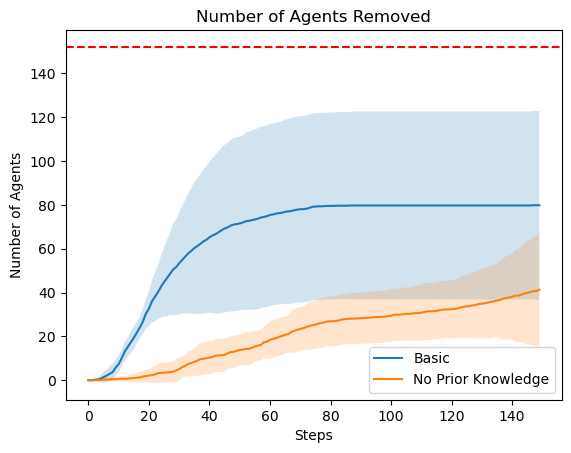

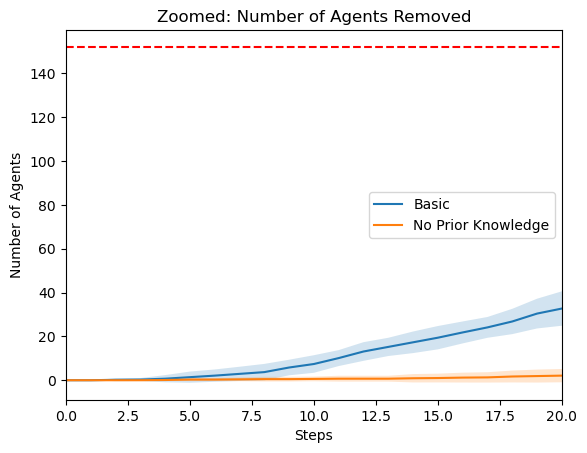

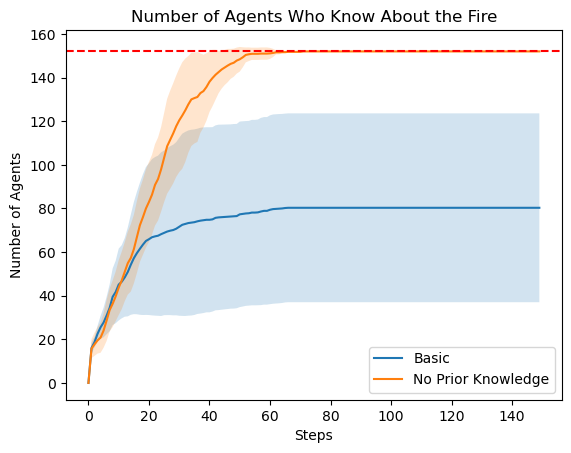

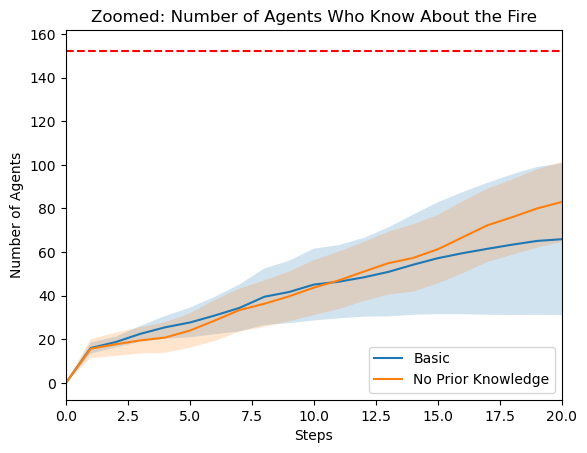

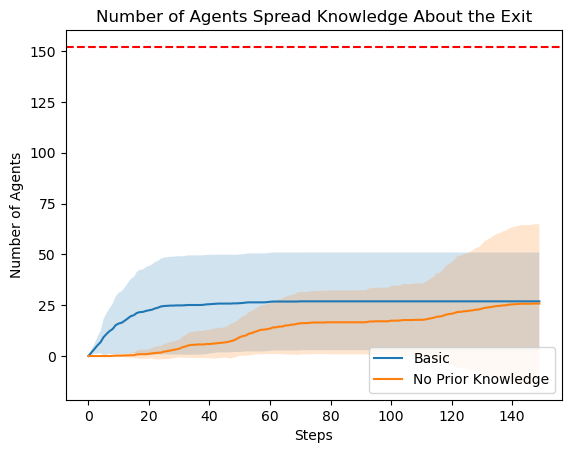

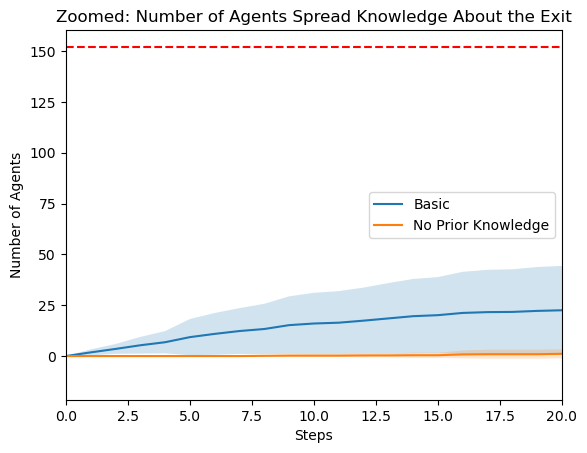

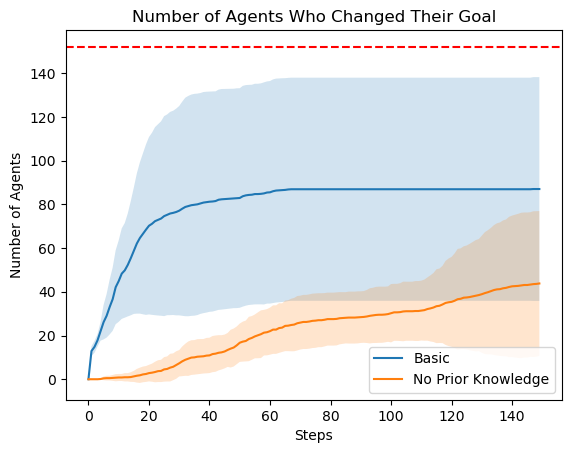

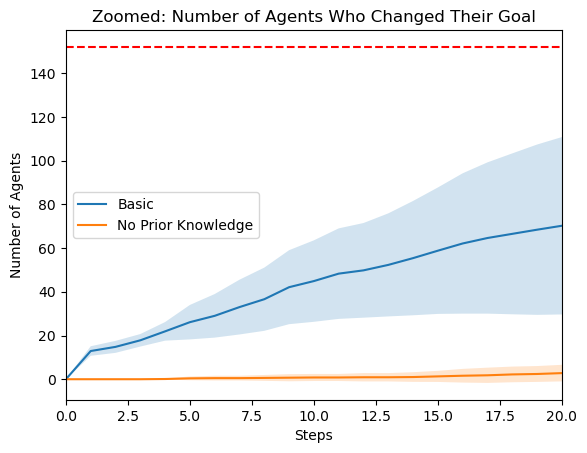

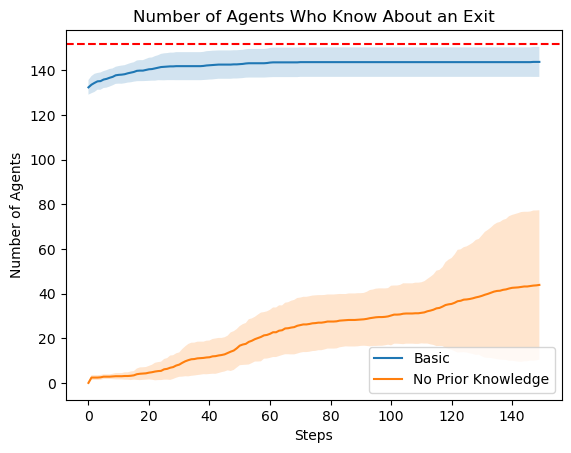

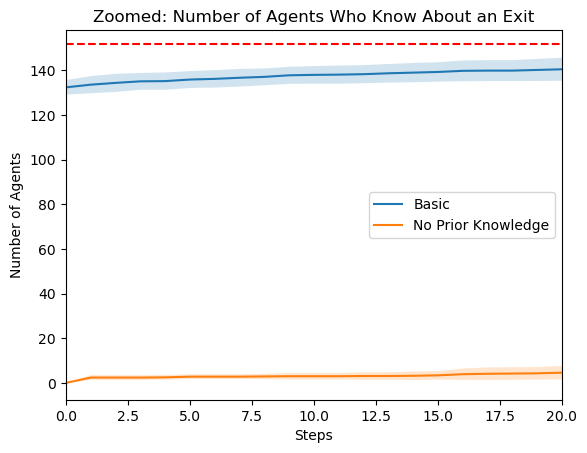

In [9]:
plot_csv("basic_removed.csv", "no_prior_removed.csv", "Basic", "No Prior Knowledge", "Number of Agents Removed")
plot_csv("basic_know_fire.csv", "no_prior_know_fire.csv", "Basic", "No Prior Knowledge", "Number of Agents Who Know About the Fire")
plot_csv("basic_exit_spread.csv", "no_prior_exit_spread.csv", "Basic", "No Prior Knowledge", "Number of Agents Spread Knowledge About the Exit")
plot_csv("basic_change_goal.csv", "no_prior_change_goal.csv", "Basic", "No Prior Knowledge", "Number of Agents Who Changed Their Goal")
plot_csv("basic_know_exit.csv", "no_prior_know_exit.csv", "Basic", "No Prior Knowledge", "Number of Agents Who Know About an Exit")

# Intervention 1: signage

In [10]:
#Increase the radius of doors
main_exit_radius_sign = main_exit_radius * 10
emergency_exit_radius_sign = emergency_exit_radius * 10

exits_sign = [ {"location": (0, height - 1), "radius": main_exit_radius_sign},
          {"location": (width - 1, 0), "radius": emergency_exit_radius_sign},
          {"location": (width - 1, height - 1), "radius": emergency_exit_radius_sign}]

In [11]:
#Run model without visualization
server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, 'p_env_knowledge_params': p_env_knowledge_params, 'fire_avoidance_radius': fire_avoidance_radius, "fire_radius": fire_radius, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'exits': exits_sign, 'gumbel_params': gumbel_params})

num_runs = 10

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

all_agents_removed = []
all_agents_know_fire = []
all_exit_knowledge_spread = []
all_change_goal = []

# Run the model multiple times
for i in range(num_runs):
    print(f"Running model {i + 1}...")
    server.model = CrowdModel(width, height, N, p_env_knowledge_params, fire_avoidance_radius, fire_radius, social_radius, p_spreading, p_spreading_environment, exits_sign, gumbel_params)
    server.model.run_model()  # Run the model
    
    data_new = server.model.datacollector.get_model_vars_dataframe()
    
    all_agents_removed.append(data_new['Agents Removed'])
    all_agents_know_fire.append(data_new["Agents Know Fire"])
    all_exit_knowledge_spread.append(data_new["Exit Knowledge Spread"])
    all_change_goal.append(data_new["Change Goal"])

# Convert to dataframe 
df_agents_removed = pd.concat(all_agents_removed, axis=1)
df_agents_know_fire = pd.concat(all_agents_know_fire, axis=1)
df_exit_knowledge_spread = pd.concat(all_exit_knowledge_spread, axis=1)
df_change_goal = pd.concat(all_change_goal, axis=1)

# Save each metric to a separate CSV file
df_agents_removed.to_csv("signage_removed.csv", index=False)
df_agents_know_fire.to_csv("signage_know_fire.csv", index=False)
df_exit_knowledge_spread.to_csv("signage_exit_spread.csv", index=False)
df_change_goal.to_csv("signage_change_goal.csv", index=False)

print("All data saved successfully!")

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Running model 1...
140.59427399671722
272.2271017303894
172.43141717812938
173.42928477813396
90.85994279502488
83.05619857739936
76.08039755732514
183.18626720352617
114.24407093999604
159.47493401088582
83.20537581402239
252.13985291174546
333.1482782936462
279.3151024782194
Step: 1
10.798999211671381
76.78343352111197
154.68837144276756
165.4752664313205
190.43402372431748
330.7116274379317
156.60818275291157
86.17909433346148
154.03655081173525
159.5499507212787
80.59938187298465
268.10388032088883
72.0847238110875
175.05789018472012
88.68779531502851
293.1397059792447
Step: 2
207.34351808784777
322.6860524078031
80.4730661930003
69.36615097185796
160.19740247337984
24.906802020239954
281.4427485982791
172.0040914207608
162.54919540645864
81.45857011158472
91.34609999817117
159.634456157757
151.50357617410944
77.73259527759396
190.4589337273337
301.06344583989016
161.64949048374817
86.46299079667004
Step: 3
62.40985593407184
83.6748293352002
77.73926192652871
74.99871788274638
156.

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


65.80156174486768
Agent 94 reached the goal!
246.87794577814415
161.84590242900163
349.2796670630024
110.71108484138624
306.4301644190811
290.2444357114018
126.12315161559239
268.857082143918
91.38479415100704
124.00594804047925
286.2476965092676
163.80213106005104
169.35136704182761
20.328096633444943
113.88710844402425
107.8193459535275
335.5160931643196
286.8897082740851
84.32878147038838
119.09805057605244
215.45121768010614
Agent 96 reached the goal!
155.39257919411529
169.22376469615887
48.46626213591048
123.67778051604755
303.6760978537782
150.26323625823215
70.20225927797392
265.01617109119985
214.71757129674958
341.0526667615877
16.66083244312831
70.47549880264341
223.49137425002775
112.48329760307884
176.08599049990497
137.0299845788879
190.39226036435466
258.32984704389173
125.02919421982303
224.482751084978
341.09963459149924
Step: 11
185.60284713412764
294.4041924569826
296.5497972456062
313.36943535856904
306.94679213046993
173.13449144590024
183.59727151322525
102.518678

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


222.56725391723714
342.80145753541944
171.74824819209218
154.12035447904427
200.0118307642191
213.3026978313002
130.25556759160068
146.99320445929908
163.34365312290691
118.10495897525415
339.433549924061
129.98361782780427
200.55882054978548
146.15471974718838
173.59103862917684
Step: 1
174.45661600251984
148.306119153176
179.30107826625138
121.17991766748717
338.3351345817017
177.48813842013894
160.70512517599175
157.61584078362014
174.56462124020572
155.82766142216747
329.7848145855706
184.9504239543466
200.60119145348776
335.41130981983093
146.45445685534474
143.038532015334
142.75626052029804
221.34894664376213
Step: 2
149.26163265026565
322.27041643047517
137.3930688721617
164.09027143203363
146.40683455223308
194.10263797680787
160.44404535065257
153.94893511782016
169.74298571319892
176.60242959159547
147.00362567495415
339.37725456215173
158.2537293049779
177.68862196994812
182.7674118037035
334.5799950316386
191.09867364413373
138.4625488134336
169.3155065540183
Step: 3
332.5

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


174.6204044100503
150.8719566405725
339.9891776815416
5.406402754183251
Agent 11 reached the goal!
114.83542967707676
301.56370076050536
196.00077845889314
222.02244381194018
316.4119177978183
331.38407825984723
147.30768575334238
217.08800165192736
149.2058333508561
152.70174995016114
235.366771529274
124.68218537826533
209.4904115676491
162.74223210114562
311.05197650278103
143.03218294959336
324.4644475663093
Agent 35 reached the goal!
206.23264059335662
31.125945572740797
177.54184731312077
181.80857064615955
281.66366360611545
124.7415055018211
29.362307903732713
120.9099826858682
279.28781088575397
343.6861585379352
23.821823849781005
192.19940368670174
Step: 12
60.2674589161295
210.58368041248863
102.07065178099202
Agent 1 reached the goal!
343.895441661987
152.6175262222812
117.08972196770722
149.28553865724456
158.60438263583697
340.67122248838643
329.0500052047202
211.5826604004423
131.5944709197031
308.44433753566557
148.97296157692563
246.2060046072231
199.33264090831196
31

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


145.63468844516842
135.1592640366124
210.26378428270263
Step: 1
129.39609342306704
154.12062248147592
219.51416963900937
112.02144610053419
345.8655086516376
118.3067066797005
154.05870855268287
110.5914420685191
152.75525528190474
126.45034577995679
149.93618973426527
154.0845457437359
141.45741178758703
128.1514533756691
159.3797180605699
171.32048698682766
187.00438948613134
129.5734309115848
167.17561479919556
118.10407220616452
204.6422781754351
124.6239404572484
102.19907852557367
133.95166843458202
161.74482659896475
Step: 2
128.25391976329854
132.26852338804864
174.19634204364425
148.2716190985093
151.0484305748458
152.43420073879003
130.57240201618708
227.88553985386218
169.91749694217754
115.33967853968514
146.8684955180504
127.90747020797068
105.48045830600438
126.45413774029088
115.01250170536001
149.72034454635073
163.1664626039446
152.47099426853555
135.39638909326467
0.37436392205743374
128.9938416942815
115.5843204653029
189.31942253161765
126.88566886183584
116.2633955

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


135.1566647663254
62.73150102105143
62.6004015567001
123.95907335367698
42.69643788815437
129.47008371351967
240.32572253602189
13.367848215501084
173.23385665270087
132.75345914647937
130.11565762501354
150.4891403897206
187.2779492987413
148.88435181583782
69.45007924463947
Step: 2
18.27878063508126
129.2496907816484
311.49767843299867
172.07250408873466
8.183457774413295
48.112671737762696
140.29523049804544
54.86314503368859
130.12082092988015
112.19643618417439
160.76792090424087
131.90182785682902
131.35530045853955
120.14746865117402
357.1383560410157
138.98949220572086
43.48971174943699
160.95645376177941
148.5913136994111
113.13785556806549
10.483134714120599
25.28133597863233
342.36732375244014
136.92646318526045
148.03118681458477
144.60197518504643
Step: 3
345.29981235577213
148.8554616140521
109.52850356818415
166.5918370342644
139.13716826762317
161.06069845136938
131.36607272177105
13.099867275539236
43.258208942292256
103.76020077021161
145.50216835613932
135.5036319188

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


162.82737327090697
302.8057090406509
135.87508730687568
182.03023570493875
176.6643029329111
97.63498804265907
88.41519668769165
184.48239333116783
94.67596476325252
108.85093073492708
166.84870418975004
7.016226575532759
Agent 141 reached the goal!
299.03566875918614
357.46713978170004
171.09929112828863
Agent 73 reached the goal!
139.19588296292267
6.354366813046969
207.3110492141231
323.57212667051436
120.41605043373286
166.5355248804023
339.45315057843607
158.022791808162
5.2029093456910935
146.1674273576413
217.52552926868972
130.3664794132137
134.061144341145
171.90752264495725
20.168009986460184
21.288980085499944
301.0911084855326
333.4505807337585
61.341678927118494
97.51680275433807
192.9993178609888
221.43559364480836
199.54411243342904
89.63420394631481
155.245954720706
158.68896639291333
172.87297734558717
159.66387976696632
120.0311391469122
Step: 18
290.248459252719
138.16272787835229
104.8860022400789
12.488080194567477
126.92400935884527
151.83025156589324
156.18402112

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


205.46089058766148
Step: 1
171.56937597342954
178.17320046496727
207.48947013901503
33.450139144896724
165.98084662415977
155.126806423067
42.04625403919035
137.77303555505853
181.17925934778106
180.3824349642646
207.04367937526598
172.6690099636183
176.32705522639378
198.52174908731345
125.52785870262565
64.66595381188864
183.00398297682014
Step: 2
202.0911990678367
208.74286258982207
187.7317584113038
73.00325863771471
165.19938168011151
203.7426325028871
196.28063612796115
180.29818711597096
34.42379240198998
165.9555919647831
27.442741490724437
142.1198028713049
149.41684450898003
159.81914004426443
178.50704293517856
55.634308414710866
182.83800939966451
39.94291085930019
197.63991490330974
180.59415227378918
173.3457523444825
48.972504902439695
179.2178855987363
167.39813491581603
Step: 3
66.98731188327153
186.10243194817113
201.705623634916
50.4783057917807
200.99620670149744
171.37866519239535
178.2346023531
26.58043914029359
246.88661903379582
37.98917689928443
147.06696601815

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


135.68629751842036
128.91988051351385
122.61786661355973
114.84478983373441
150.09886758164993
122.65876441204018
16.396895931309288
58.4486270493273
124.93211658174057
356.8954818939878
100.80239297495518
43.09594238981168
Step: 3
108.02527076285538
124.46941155279322
71.69244766151533
143.39932109092
130.021859869283
309.5377111337263
133.57825120247298
354.64426670429293
126.16752274625958
127.4068425564785
144.0870524724083
16.17449902358156
137.5542574863902
51.42882539860075
119.08198404124082
32.77314488958052
37.411881067962646
Step: 4
136.96635710531
90.7863925655051
12.782135760986135
103.68758454711336
195.29273070972505
134.53396797183575
89.04524958594544
47.26735340504183
133.86446624247856
126.23740633437635
57.17772655131846
130.84389233132896
63.99289424189759
123.05568145578367
113.13192437308975
117.47245690152145
359.07690403416143
159.8489701015079
93.24278229621362
15.53881370797135
122.87108630203821
95.85699384850523
126.04145917784791
137.8087310755605
350.8610

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


353.3843519435023
294.6391689047996
134.41967369915534
105.98265781697687
123.68847784627596
25.566714378119016
Step: 15
319.54459108040544
130.93019132122936
120.86631932621898
132.2013398525503
347.31873041962837
297.0514049249675
191.03083217159997
116.29852787732949
102.65258039157996
349.63573133729847
156.2401969992099
307.04434699303164
115.5694012837906
84.96645024925922
139.81004439721903
133.25662677940193
37.54050511051585
342.45452128554365
99.95056842231683
98.01662807735198
110.7380931299033
128.33399300499522
136.04627652621468
298.5258825140229
145.56682049176894
44.18175172817608
359.5901567488745
251.74262840480955
Agent 105 reached the goal!
168.53229447476474
309.3456331267887
86.94688470382464
125.94403919784901
177.4119244820648
86.08104613199134
17.014228985036894
44.20260096759591
83.58386844509178
327.74945932677826
Agent 50 reached the goal!
19.889264451063642
5.376790272714288
130.89783964762412
107.44754957197635
137.38866895107503
141.47088611990557
92.5473

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


188.20114100426895
156.48558881081726
Step: 2
174.24470260428365
153.43866005229074
131.30815701013046
193.45141384090118
147.10112931869924
212.74031338882352
330.7649025651717
168.7123652258545
101.23596788692265
172.3362678684203
161.7863753473354
342.26282209031285
177.68103440718804
156.1943287665989
147.63412658537626
0.1510651365442186
177.07123470469188
331.1212964472294
130.1018133766238
184.567361494024
153.82079104572765
151.35931673124398
129.79096928035008
154.43407097559535
Step: 3
148.19512128106584
163.80706292751742
330.6091568309948
167.37257494454764
193.71257046348717
164.51707891199823
313.992755442144
152.55445283370074
348.0199479367609
176.71854687086685
131.17694108244638
122.63076716054476
167.56879627390404
169.30732135786025
148.2909886699464
330.5043754305314
155.4690882057682
342.2541367893835
161.94461705743706
166.42428100099985
151.7568743645476
171.4030813269928
351.9634212027332
149.83650099308164
164.98133912752544
169.94415599503944
176.632501623409

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


218.99981829899644
112.34888603838036
123.61982639301645
94.99723962744974
Agent 14 reached the goal!
93.51435466112844
148.90999545270643
112.62765721683562
63.48643391904062
109.894802763979
35.286884806003705
195.30990266300958
353.9132763309006
195.73731228369954
186.28242858990964
159.06119875603602
153.6035272755764
99.96197480883167
157.33632295354218
112.5
143.49788953312463
237.99045269638867
148.06859698702894
30.0620363098779
161.4176469371258
44.13858851172154
179.21441346740616
179.7038173925024
41.536826604661044
154.58984710263795
188.29506543644857
109.21953681071783
Agent 143 reached the goal!
166.12103443381034
170.31421468876096
44.83170544177386
141.39274164542792
Step: 20
195.80709425268014
353.7638263298513
Agent 65 reached the goal!
124.79219848183838
86.1821510693868
40.51128331644988
151.00350716335672
237.1484246648407
165.48288482976602
177.03179009924273
150.29704585846952
95.03242329144922
226.19227579848288
170.93293203357823
47.41783801481176
147.52395204

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


62.38939219031606
3.4755374456189756
70.32552732027534
196.47706612964748
203.99557035374258
186.45848759298917
58.15640431278106
50.60336622894812
Step: 2
194.22321534757958
80.47485674350463
194.01369966057314
201.0621116630965
318.44705870258406
48.26851564465426
53.20026296104703
13.942914906093474
200.31268338015235
40.17591573278774
181.6791121457062
257.01222273877073
34.1843426523357
55.01741883813906
359.742549600139
191.33998462533177
180.51382365551498
191.65899538440974
63.29958585136049
53.341137260778694
Step: 3
214.19249552346812
178.21206106109804
49.71441968600513
181.32366375087292
62.62286744079223
Agent 21 reached the goal!
180.71425299104314
15.011709683345686
354.0486085364727
Agent 117 reached the goal!
57.9215773193969
159.4841876131951
204.58419850596255
8.862185155423516
359.6078055657379
43.09244129068125
193.4689841588164
174.50629216348003
181.12290965522072
174.76535381386842
57.14499503482979
17.008088783408255
181.64595485320643
202.7966516722731
154.942

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


317.3296313944468
Step: 2
150.70362229089244
145.10389915716829
128.7434243952907
157.17246151248233
3.0025259529529933
134.22124517287818
324.9133090073135
138.24026711586103
140.856258586507
165.92368775214737
152.95198875699649
126.2020378799952
Step: 3
109.04304625361176
139.96266185828443
132.04963093666382
100.06883434162836
140.14631662298748
12.720295871271194
143.20540337790567
152.81919119766096
2.640534873770509
161.4024177084915
270.0026748534918
333.8600803103295
146.18969218373434
151.04516972878278
136.05875375617865
Step: 4
145.51108528269333
162.08214720148248
339.03448680063013
137.44793365956826
134.59053891783418
276.9028062153402
158.5346343297523
156.3810865669358
150.8093331612289
141.37259336349697
165.04829297866553
138.3049638752621
148.02110412127587
274.50310092336974
340.1752851813275
6.316390173101258
147.6526020292282
105.39941310936396
98.07489134027894
65.13511028336762
Step: 5
144.46272542025343
326.79785090963014
139.32198947490386
100.45657246388389


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


168.56601493980395
180.60217103569073
126.09223526704909
125.27668232764493
196.7933608973605
Step: 4
194.0550147031379
145.1215910774487
Agent 23 reached the goal!
129.20820750799572
105.42198374696244
209.611889318528
174.0554517664802
125.44070501834845
175.39981290330502
Agent 70 reached the goal!
Step: 5
112.15856165003396
119.48019633356638
Agent 98 reached the goal!
126.1227640033468
220.22373790604115
Agent 65 reached the goal!
192.62088164937913
180.95916770045434
Step: 6
125.57616848451678
189.17931075817174
119.99707593311545
Agent 120 reached the goal!
199.3455636360226
Agent 41 reached the goal!
Step: 7
124.25918248280543
Agent 48 reached the goal!
186.5726735822225
Step: 8
181.23326157749008
Step: 9
170.34798683479247
Agent 116 reached the goal!
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step:

Visualization (works?):

In [12]:
# server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, "fire_radius": fire_radius, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'p_env_knowledge_params': p_env_knowledge_params, 'exits': exits})
# server.port = 9987
# server.launch()

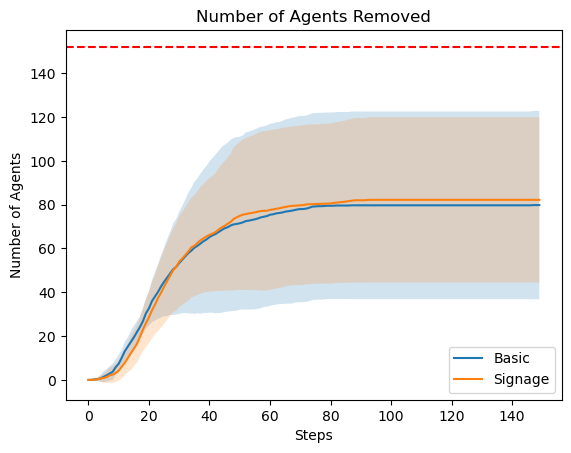

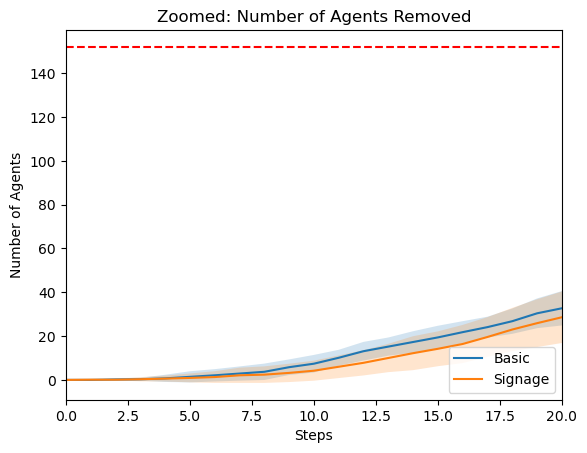

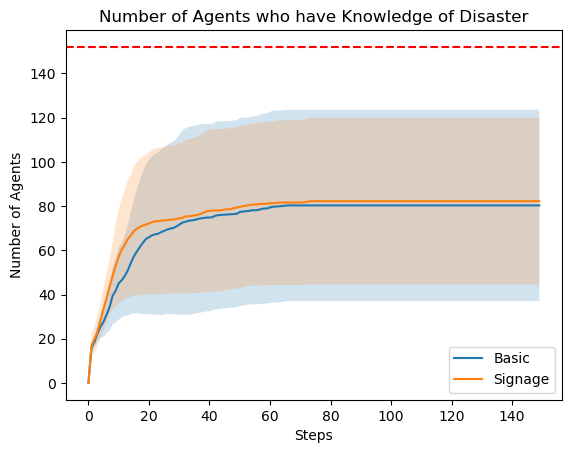

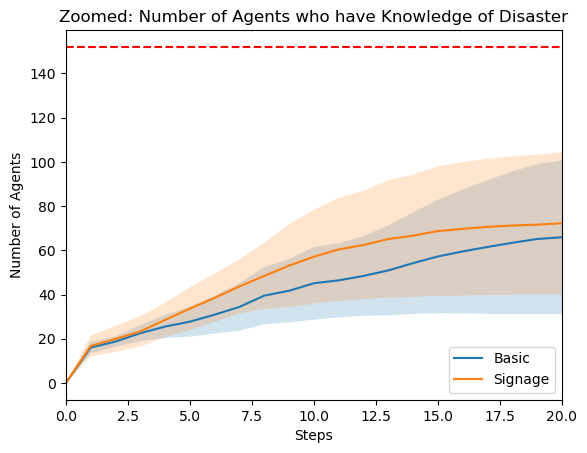

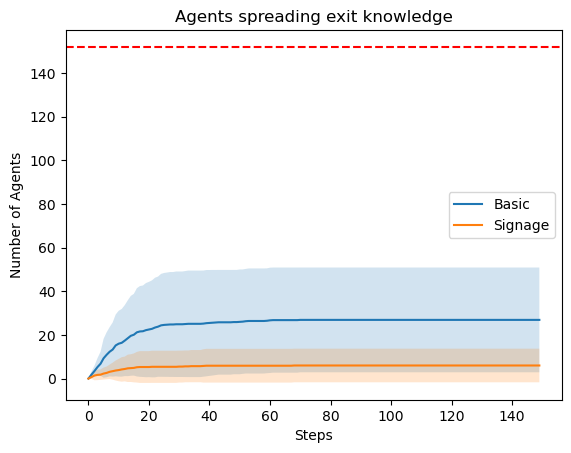

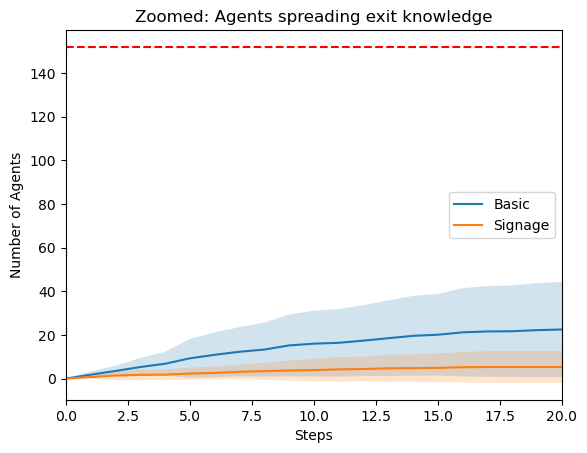

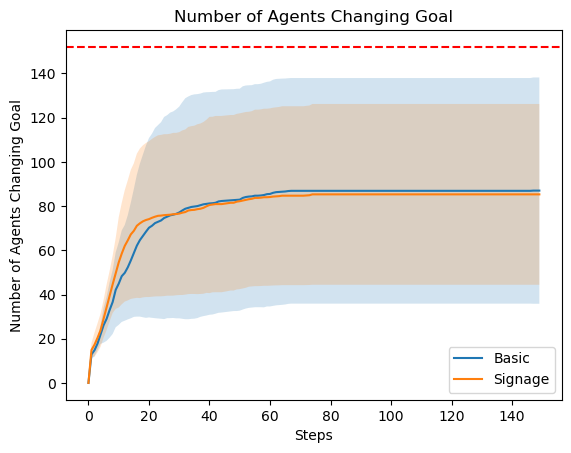

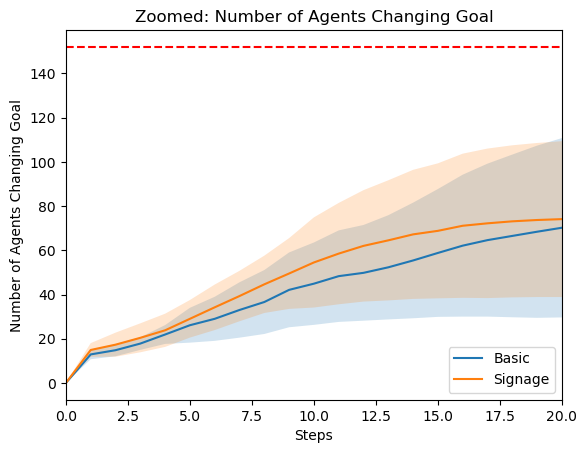

In [13]:
plot_csv("basic_removed.csv", "signage_removed.csv", "Basic", "Signage", "Number of Agents Removed")
plot_csv("basic_know_fire.csv", "signage_know_fire.csv", "Basic", "Signage", "Number of Agents who have Knowledge of Disaster")
plot_csv("basic_exit_spread.csv", "signage_exit_spread.csv", "Basic", "Signage", "Agents spreading exit knowledge")
plot_csv("basic_change_goal.csv", "signage_change_goal.csv", "Basic", "Signage", "Number of Agents Changing Goal", "Number of Agents Changing Goal")

# Intervention 2: announcement

In [14]:
fire_radius_announcement = np.inf

In [15]:
#Run model without visualization
server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, 'p_env_knowledge_params': p_env_knowledge_params, 'fire_avoidance_radius': fire_avoidance_radius, "fire_radius": fire_radius_announcement, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'exits': exits, 'gumbel_params': gumbel_params})

num_runs = 10

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

all_agents_removed = []
all_agents_know_fire = []
all_exit_knowledge_spread = []
all_change_goal = []

# Run the model multiple times
for i in range(num_runs):
    print(f"Running model {i + 1}...")
    server.model = CrowdModel(width, height, N, p_env_knowledge_params, fire_avoidance_radius, fire_radius_announcement, social_radius, p_spreading, p_spreading_environment, exits_sign, gumbel_params)
    server.model.run_model()  # Run the model
    
    data_new = server.model.datacollector.get_model_vars_dataframe()
    
    all_agents_removed.append(data_new['Agents Removed'])
    all_agents_know_fire.append(data_new["Agents Know Fire"])
    all_exit_knowledge_spread.append(data_new["Exit Knowledge Spread"])
    all_change_goal.append(data_new["Change Goal"])

# Convert to dataframe 
df_agents_removed = pd.concat(all_agents_removed, axis=1)
df_agents_know_fire = pd.concat(all_agents_know_fire, axis=1)
df_exit_knowledge_spread = pd.concat(all_exit_knowledge_spread, axis=1)
df_change_goal = pd.concat(all_change_goal, axis=1)

# Save each metric to a separate CSV file
df_agents_removed.to_csv("fire_anouncement_removed.csv", index=False)
df_agents_know_fire.to_csv("fire_anouncement_know_fire.csv", index=False)
df_exit_knowledge_spread.to_csv("fire_anouncement_exit_spread.csv", index=False)
df_change_goal.to_csv("fire_anouncement_change_goal.csv", index=False)

print("All data saved successfully!")

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


Running model 1...
188.07810607063462
220.4034673066473
202.5
143.17679177039963
110.40138234297977
347.45233146964495
120.91939772248882
187.5670298633679
0.9221669000857204
123.80993247402021
145.7204689340673
81.15187543943665
156.73348982983484
126.1565287133917
137.27514056883356
53.46375653207352
134.70698769096336
104.95390677775535
157.5
142.75643716353125
112.5
122.32859954659078
87.87022982724575
114.37820039993099
340.7052759304506
344.8394300732909
22.158996190321353
119.83087008541312
168.80993247402174
157.5
338.18857901187084
180.70145524905885
79.28526802487995
181.94678185099303
77.76361859853193
189.48104540657755
125.1537681747726
122.50797980144115
207.92114848579357
104.36083236255811
133.81301021870678
321.4957882676712
79.99049565259602
167.3175007307896
150.79016319223783
67.5
205.9351984157999
154.64835881042677
137.71485473986445
122.03219351505136
192.19515353123134
92.09191971533382
21.53184993955866
169.06417539617965
153.68592516571456
182.65281421481797
3

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


96.4907698273957
52.372283718111206
348.80993247402085
145.88204435537853
166.0153488695852
20.491779591461814
135.7723910174467
98.46375653207353
159.6241281885462
158.78796993104532
122.96534190509949
75.2094126848557
125.52125153065225
31.962322208028432
353.35635202718913
306.28241656572493
232.93927386159197
328.247740780876
85.52423076198548
270.3845867475969
175.9349488229271
251.74055423204575
41.611035831056
292.5
Agent 120 reached the goal!
272.22407405372564
346.2883784796146
344.2504907027298
164.6756836794712
157.29089154310333
118.53100851427325
142.3883222261643
121.96232220802673
6.094295287408631
324.7058553461853
173.69098269097896
22.5
296.78635854012487
157.68218987348945
164.66887215621193
131.59321191326353
156.86114843826965
187.4834857735882
295.4104104317608
130.54391099822215
115.57744134295541
168.8127250082393
95.92810259271579
328.15664163663763
126.25321784306568
355.66802084449944
99.74119061597231
278.66039080320024
187.94573637456244
201.52606042092754


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


157.49999999999932
112.42021517303588
54.2077326951606
134.24588507676378
130.93494882292134
153.0128696432822
125.0744171924894
180.14534406014954
22.5
126.99898739887713
219.30380580926254
143.56330458524593
94.55741352623936
167.85097553830818
57.62027333443213
346.50921271356106
75.56590354715571
87.4024090450733
127.26126444423384
257.72948270836986
189.09921729292088
112.5
112.5
54.72558314691259
80.49461679191865
318.40163309133715
353.91903720398426
212.0133171369214
173.1422464572038
215.4443085107671
355.9349488229166
144.33685317341536
359.8801350519619
205.48785994169359
136.99472432212912
342.0438349138638
271.5173314480828
145.68843715646022
125.24034686739739
323.71791266356337
4.8384406845633166
128.82136083499887
134.86216020510227
178.68179328815205
90.99546794953608
127.16172446303123
177.838354861773
19.11403355020507
265.16972661208723
53.61533487140436
336.53992498921036
359.30894898894024
138.9532318672025
14.722843907211157
198.05343187503593
140.92972890892418


/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


38.19122313407411
121.98132956299834
148.66000817366032
310.98891901158413
237.61566465042586
178.2227844986521
160.84096649793835
103.59680958006815
282.34099588465415
320.2658565526533
125.51767567763743
10.112101846560849
123.90374015324991
223.9086982801192
342.6944289077348
112.5
163.32055609959946
196.6907474057416
252.8620762697758
157.44218950472276
170.02880770915277
131.622851233787
167.47727402137983
34.64153226946893
164.0561208157502
2.7177251019335102
117.47512200724037
132.72485943116652
202.5
134.16434561340975
355.934948822921
229.42555132429288
337.71044793891554
76.47772087901163
74.39505368103397
181.43204732381216
112.5
335.1446799148978
125.30426606528547
352.1299245939616
112.5
191.8432121953378
319.17003161271833
141.26782784670644
183.317250529424
171.12115189236852
110.35977651424015
316.462488974568
117.17931434007669
119.13580657983238
60.17761807617009
142.52183593738215
98.72512778750495
282.42814134186204
103.09425977335019
157.64317711343736
164.30564658

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


214.12758957664798
80.87063025475872
276.8151622196085
125.73497395005973
326.19006752598085
290.60430001659705
209.58694333461207
166.66234704572457
18.640817449286242
143.05873022366507
3.042278842986601
202.5
60.77474073395886
157.76918297116865
132.625161871459
154.2067077669014
123.26410259235874
93.17843247865002
175.9516948080754
105.71096459497643
131.67489485915377
160.52554205337472
5.240817865545413
162.85428281789993
168.72165523018205
112.5
343.2883047710665
31.347632340999887
1.0220618577847524
30.630102354147922
162.40053897128
76.15975646725803
194.78541483152696
153.33108830344517
166.66715521149436
319.06505117708167
117.0979809398813
96.12339602832601
169.80035205376723
136.9072671975108
144.79584345606122
218.24889455238372
97.33969742639034
Agent 50 reached the goal!
90.59392558368488
120.95021608823839
333.83071685098446
93.90717311445346
126.17959274642516
105.46436175037289
128.65658501254717
121.87055386892963
312.6162685666195
98.51838701242887
4.0650511770768

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


216.13159403316556
101.0343958432272
94.64636259603898
341.98147546570857
288.09825039756674
195.2545611294927
19.13353933657028
25.008585447647867
85.93494882292201
192.90547908102855
85.79180720072374
177.87589438132488
102.93232013702223
200.84446921893107
339.2515902359856
95.03811437704616
345.1138573347938
178.46615023425173
181.379882695867
112.5
116.77823377019648
145.57750784304105
0.6985905136476447
211.43771325482757
169.67236536535086
75.2606947723763
170.84796340188007
138.10497253948716
Agent 138 reached the goal!
22.5
162.81739930167467
82.14709848006314
112.21187307467716
112.5
153.92366562500243
230.61836599026478
173.44539590092188
83.77899217843728
333.55985899950235
354.9468660582167
165.48342236643873
168.11268677893673
90.15692761998523
160.44103998755944
99.7048967858371
107.6086193474381
181.69330992923133
5.177697904628413
75.10956034414829
112.74259310735822
195.70456992768285
164.6026129031425
188.83709531026605
92.80589128916829
134.3014094863512
137.0669808

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


117.38199226799281
127.48728650440317
231.96829511442934
Agent 43 reached the goal!
127.24356283647137
266.2951208507999
129.525260607564
158.14406776289084
150.37498365110133
206.0775252470066
315.262732341752
Agent 55 reached the goal!
191.62672852446744
227.05732559927313
77.98051417805328
135.93094613993634
128.44539590092384
331.650840008092
Agent 27 reached the goal!
202.5
114.88594403038879
246.35458280833177
124.88819811025114
145.92996103123386
246.91089326539782
169.8368056914446
110.63438550954096
200.04404872578743
145.68692234580664
72.30496668554218
121.03076560994798
118.02487848930788
221.16846984291686
31.93229080225622
124.7911351120796
304.087558289693
162.21099439201043
345.1400803470308
155.65238973400423
163.97338161468915
112.5
118.40753685302923
182.47557294541727
179.04861702911893
11.551204503306755
210.1674031508055
11.190067525978543
49.06505117707799
151.51381137939305
134.5084651047447
204.55138094539424
72.6944289077285
177.72862780156055
230.234742473029

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


167.8150199567807
221.7087445365267
186.46505464121444
123.65288294245028
42.91297605864366
304.0080321156131
208.41613405443368
359.0962047427696
103.03767779196602
45.83926678606541
159.95145730422556
328.92234417216383
296.20286320369775
92.02184841365653
159.33572307870446
200.05607969735576
140.25241139774184
38.548683765174474
172.63215536523373
178.73562468352281
22.5
Agent 138 reached the goal!
113.96396966129116
108.67073967542343
142.07054739761537
36.536243467930646
64.77368900609277
112.5
157.60720868352658
112.5
130.57373916250322
89.30140948635838
145.76059832153396
183.99351603606488
129.42751306414928
55.698833390479095
202.5
333.0723629108095
140.69494896733354
132.51494736779682
19.361831120044936
128.4946810196845
202.5
274.6399867907712
24.17171815989723
135.11986494804069
39.87333341333114
147.138470510337
63.32829698744942
118.26229558006722
343.6867494238119
285.07725841694827
196.67390155279344
118.77687940053328
127.2794972685871
321.757407687663
320.9677228876

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


190.80030660195385
350.4946167919188
351.3698889721173
34.46527671722119
188.85023586846083
110.99503219979074
104.66237319244324
98.45397235835837
0.8628013075018046
145.12186857871933
339.9711207979387
207.36015080943463
142.3242785415571
63.4262809202949
159.78572542804406
276.3810457612692
139.06505117707798
309.93962902890445
127.42620957987721
157.57833786451664
133.0560452195869
199.14582753717377
349.1740635980047
104.41070539597094
30.596978868226053
345.55680922716283
151.27158570879035
200.41647276263132
28.128882443028605
84.95489624579048
2.977784725542996
144.7714027249191
106.91975730882265
76.96232220802452
121.03076560994748
337.5000000000026
Agent 15 reached the goal!
325.0256161051692
187.67555894267159
188.4905223716981
97.30489629473485
139.13857573094103
351.2113844941448
282.8751515866611
181.46105230454765
131.643122274716
165.9198563592577
175.93494882292202
112.5
Agent 105 reached the goal!
139.06505117707798
324.3930513039475
105.37498365110282
219.7290118368

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


128.6237884796037
166.99620897985238
122.39256232100098
197.9272900818322
355.11704895659756
44.87807529084782
117.05453463856125
111.67787790859437
311.0526830457654
189.03752165167066
217.2559851502525
186.39747792096287
157.1724222158957
304.6898891529893
185.84277581285684
139.31938744355944
151.1598082540875
108.24035049208041
5.464051380229236
132.48310652189696
55.03125694046155
186.54768035131542
129.79786285631053
0.6985905136502204
100.1993259674054
331.14137955361207
201.92898150223522
171.71930910444462
47.02411108774826
168.25270635059607
112.91866158287228
170.02880770915456
95.33747423466455
154.28828079579637
139.6385890010111
330.0628761246927
270.90795003000807
88.3495441158159
214.391207269959
148.5273733851082
157.49999999999716
276.19052446922103
114.88594403038898
115.27926546235967
202.5
162.54292865386188
245.8724686658944
96.14162827595734
199.79775811101882
173.69184284492266
84.09846239578089
318.5811809777114
157.2152254746178
123.2039272107837
321.554604099

In [16]:
# server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, "fire_radius": fire_radius_announcement, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'p_env_knowledge_params': p_env_knowledge_params, 'exits': exits})
# server.port = 9999
# server.launch()

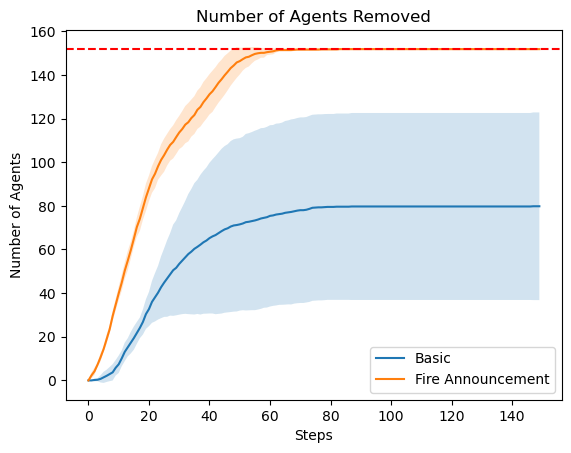

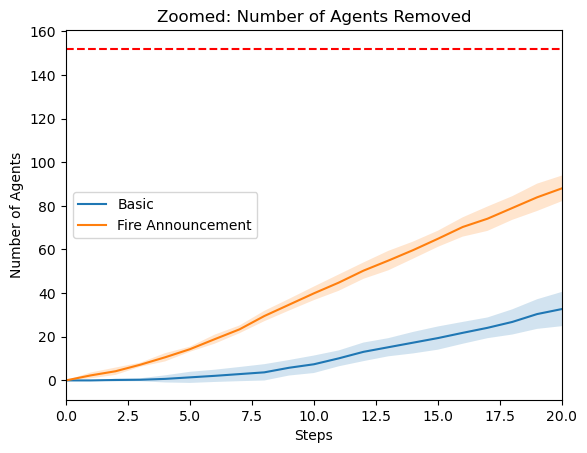

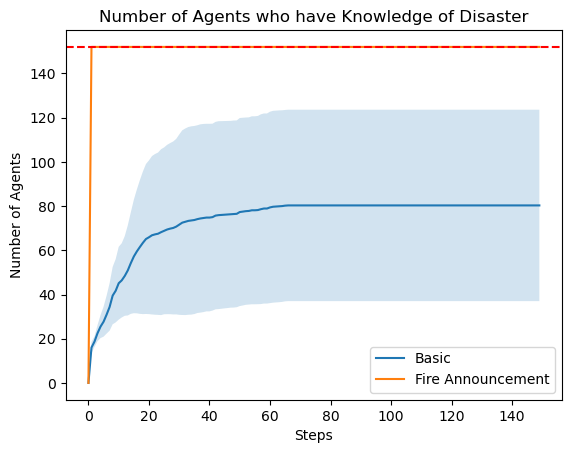

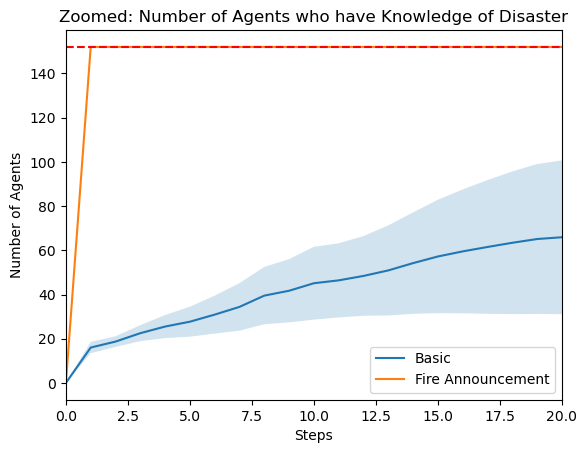

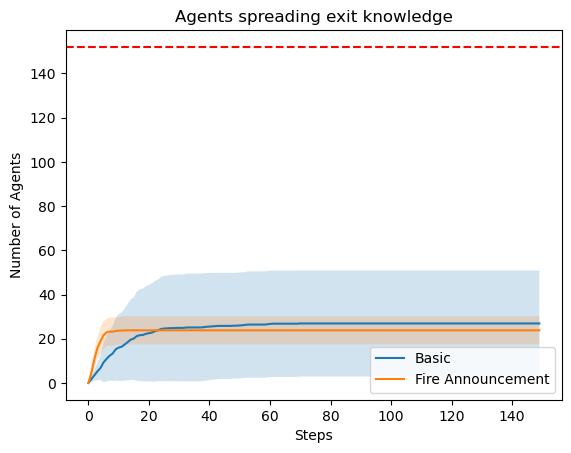

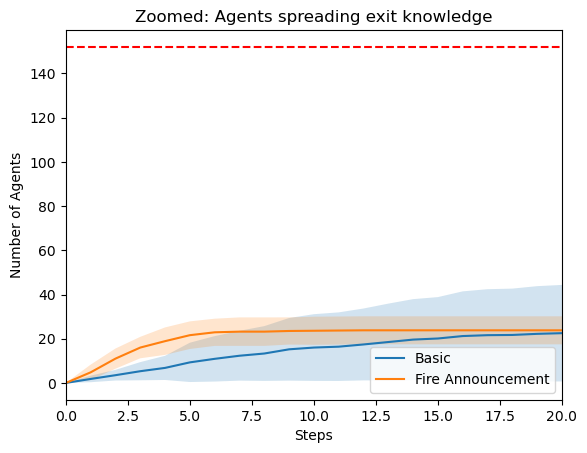

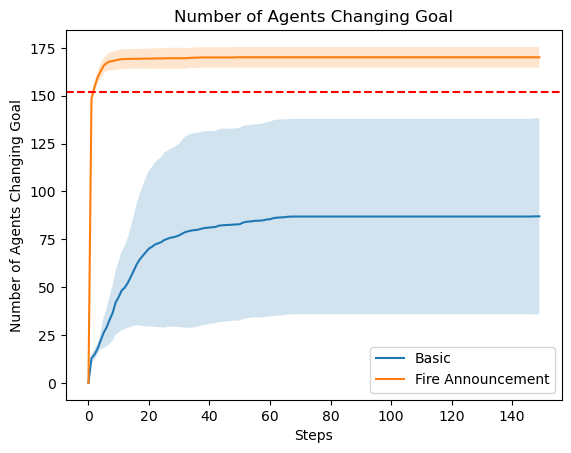

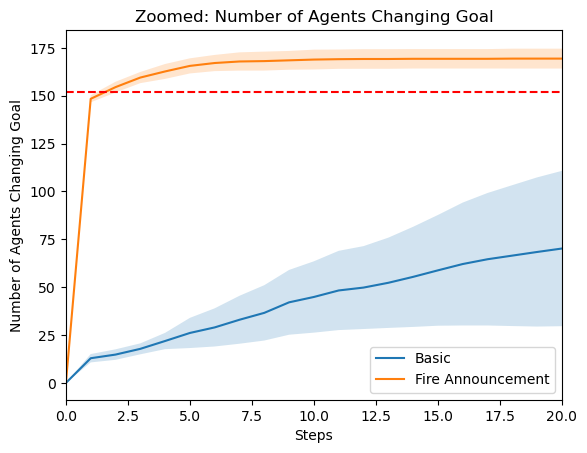

In [17]:
plot_csv("basic_removed.csv", "fire_anouncement_removed.csv", "Basic", "Fire Announcement", "Number of Agents Removed")
plot_csv("basic_know_fire.csv", "fire_anouncement_know_fire.csv", "Basic", "Fire Announcement", "Number of Agents who have Knowledge of Disaster")
plot_csv("basic_exit_spread.csv", "fire_anouncement_exit_spread.csv", "Basic", "Fire Announcement", "Agents spreading exit knowledge")
plot_csv("basic_change_goal.csv", "fire_anouncement_change_goal.csv", "Basic", "Fire Announcement", "Number of Agents Changing Goal", "Number of Agents Changing Goal")

# Intervention 3

In [18]:
evacuator_present = True
evacuator_radius = social_radius * 4

In [19]:
#Run model without visualization
server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, 'p_env_knowledge_params': p_env_knowledge_params, 'fire_avoidance_radius': fire_avoidance_radius, "fire_radius": fire_radius, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'exits': exits, 'gumbel_params': gumbel_params, 'evacuator_present':True, 'evacuator_radius':evacuator_radius})

num_runs = 10

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

all_agents_removed = []
all_agents_know_fire = []
all_exit_knowledge_spread = []
all_change_goal = []

# Run the model multiple times
for i in range(num_runs):
    print(f"Running model {i + 1}...")
    server.model = CrowdModel(width, height, N, p_env_knowledge_params, fire_avoidance_radius, fire_radius, social_radius, p_spreading, p_spreading_environment, exits_sign, gumbel_params, evacuator_present, evacuator_radius)
    server.model.run_model()  # Run the model
    
    data_new = server.model.datacollector.get_model_vars_dataframe()
    
    all_agents_removed.append(data_new['Agents Removed'])
    all_agents_know_fire.append(data_new["Agents Know Fire"])
    all_exit_knowledge_spread.append(data_new["Exit Knowledge Spread"])
    all_change_goal.append(data_new["Change Goal"])

# Convert to dataframe 
df_agents_removed = pd.concat(all_agents_removed, axis=1)
df_agents_know_fire = pd.concat(all_agents_know_fire, axis=1)
df_exit_knowledge_spread = pd.concat(all_exit_knowledge_spread, axis=1)
df_change_goal = pd.concat(all_change_goal, axis=1)

# Save each metric to a separate CSV file
df_agents_removed.to_csv("evacuator_removed.csv", index=False)
df_agents_know_fire.to_csv("evacuator_know_fire.csv", index=False)
df_exit_knowledge_spread.to_csv("evacuator_exit_spread.csv", index=False)
df_change_goal.to_csv("evacuator_change_goal.csv", index=False)

print("All data saved successfully!")

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Running model 1...
327.52954126465863
151.72657637956428
120.04726826933542
22.5
339.0886850491352
36.35347420031883
352.4527812797099
202.0507118369994
152.73635830927543
347.84833986181616
325.0973203952705
343.93600076222003
312.899730596955
62.891002721068446
154.13353933656808
64.64585118272792
245.15520701868323
61.43386779318501
67.5
38.270175334148306
231.85278217635914
102.12142291277456
8.682522448210378
67.27243216599678
62.54712616931899
171.39850176714216
67.1461459786368
78.35134224806991
85.57935721021494
131.9400348281743
116.79013355840884
149.64246658626524
117.47446414436156
172.95975253111442
69.50449976258469
305.4765893587295
0.6022302499801668
121.09615886205472
33.70908735462149
66.18886238149616
139.06505117707798
45.566656540218204
159.83412319430587
174.89026823979893
219.53521292752382
136.87537203002873
144.6166597432359
273.9992231873457
76.46992219422984
8.511139832940957
166.4726266148964
161.23615357254513
344.93140797117474
331.27036026233685
198.13716

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


225.63045579730894
196.90196930961466
304.1767697165774
61.469725679627985
159.53014725577862
Step: 1
37.02406874127496
154.9194804313111
358.7583829172115
348.1149623510173
348.36797368375994
193.9156644148327
55.169472000526305
188.02359646595775
125.01954878030048
201.55736469697572
25.135717426016356
202.0358788275653
98.57249349553435
131.67843967348855
62.97330373718065
298.6452934422519
53.62918864548849
344.54324536546835
323.34079669214856
359.19946690739096
274.6115842586192
143.9687721420779
65.74260326751943
239.61118155339955
167.92489271708357
347.2561974098538
318.62066073021504
308.2104500436882
6.3995697602558295
336.67336143913826
172.1172220058458
89.58071476257182
163.60511482393812
70.51990636839331
135.01210469086232
173.53777204329472
146.64677468819286
79.42246296974515
344.3538575118396
205.2761222696796
90.88783767439178
123.35423215865946
149.32989310679767
158.34369664666133
163.01845532326956
136.15165547302732
194.8324876373506
158.61181996156404
173.73128

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


178.24708048321486
335.1620899186796
135.01901577799708
197.36329962874515
125.89981365822666
249.55322512325847
205.18144971479865
48.101511468029905
209.59627523425084
24.206051136306712
106.7405682584169
Step: 1
187.13180493702654
347.214169695945
157.5
181.8906715028924
153.57081362217372
31.166065632834687
244.87302337422784
339.99574746179445
11.848471491747757
179.03073233103518
152.21870126250286
131.8941190202765
335.4245493665893
345.3460594038319
57.97373654318989
166.51979022829516
327.2316827989522
84.26243541836696
185.49203992950459
191.52770639962947
155.18086750219092
186.72318280675265
171.6966143003084
166.94040222753566
78.68076137934347
182.8487097750059
193.59544046325414
190.12519217596952
260.3289644690468
Agent 78 reached the goal!
155.770424395508
342.5626148371554
139.2465260668385
160.25879441530967
240.33895114688195
83.935942142504
334.0507565704638
16.401302148077455
340.08247439940425
59.259123705998505
160.6979717112597
358.44497514260365
141.9019731607

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


226.97682233831213
115.84929708934108
328.0810510378632
331.31384969715884
322.1878781115207
40.438730342843144
81.13118655333
234.09770431324404
322.8317452276325
Agent 36 reached the goal!
124.71559819170102
175.91683013435588
303.51037820693307
81.23882598629083
320.8835460900067
123.6009050835209
341.39030710297914
154.6109028856114
353.40057699557786
338.45917462863645
77.95579797191019
36.123196165035324
127.62656022528891
189.62204044768063
151.42097151716794
248.84883705962346
41.33119888521927
219.97762341325557
169.47018525981798
292.9955657384288
151.14213800668188
74.03099476178849
166.85479381496688
168.57064150224966
290.8399274930065
303.7078005726901
50.30049596054696
21.760674015809126
343.5186847793921
336.77410245206016
67.70126799417119
100.8273712271925
153.3303905286454
114.80836155657434
137.13215327484497
7.150085718918254
307.5904502956662
358.42366865542186
107.27004187355581
91.42340060059672
15.671945445158109
137.2415565988075
15.741538641698423
333.0548710

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


329.78935630683713
150.1366273489761
172.87626189112908
134.47634650132667
158.67549050184977
208.94618686310545
9.769022071151875
168.86909642041815
356.95484775119695
357.4964855341887
31.528318407594767
78.80993247402021
320.9711478477439
133.17354183230094
50.17999138051326
155.0104470779978
128.69557897572838
96.44160166315413
61.8156640149558
230.22059363421155
342.98820837267056
80.93496916007477
337.5
21.7858230776251
313.4289697465921
170.7934067660271
148.26970979574514
351.78431840920246
67.5
349.76477372789185
161.19074697534973
175.93494882292202
Step: 1
184.70881337343323
139.09356243005297
144.69508667204136
358.2059699858603
48.80688702920014
196.40280731783153
327.03513739119364
338.83586944127217
139.13860772085656
113.15363474773841
347.22415150700937
143.69506811043482
350.36158084991104
80.97283036046385
330.4812413361715
357.644426072302
59.98249640056797
155.38102102056268
334.41405493423457
69.5082511366914
128.57395421265514
92.51029418376126
116.66363977074535

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


282.09740716925114
26.940011235500883
Agent 26 reached the goal!
359.3256512854531
13.179667066263752
16.059524213558383
128.78077562901018
12.581718811192802
320.4870036227992
348.16784008652644
14.673663792901678
14.87368875302887
335.727982246335
6.437973986349803
335.83506800986913
45.19106659484751
12.486643394339792
41.45690233158865
189.2186393932218
21.437384117711517
108.19778163657982
307.61172548143736
81.4048707456504
44.24696691507698
186.40883322585208
126.09659615805647
78.46996412033506
55.07495445930133
315.6883346460689
93.70509646102423
Step: 10
144.45974156342334
153.19443688152293
38.85076817490493
96.06154475343628
Agent 36 reached the goal!
323.388963585495
9.966097186697086
152.99979292723225
332.46398560104325
86.44962705543338
352.0090348041598
133.4956936458014
187.31458815020105
18.158621073971982
13.279577985231587
141.76581855454998
335.4962177185947
26.687573425234188
159.11418972587035
32.19160153747997
16.955525491214743
353.9976381863161
191.9599513580

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


356.2346249791227
61.018825893316865
83.82545626012438
161.46205238612382
88.14730931478088
7.885303086306067
162.70990470369026
191.73819109691001
323.1703451938487
44.47937797691779
171.4814159309041
64.85114590853499
352.75511870306093
328.67719162721994
74.54663665108048
310.67305183190115
322.9011388718649
128.99082494048167
167.31837245351764
139.06505117707798
59.56421948096153
238.90099891851327
326.19006752597613
42.47392285830432
341.6410898448604
330.6918972819003
131.93497764119067
315.3632044238163
75.46511741299301
326.27122108354706
227.92688628656813
Step: 1
1.25044935343643
67.5
15.656489125988346
299.4904671759472
44.45422234811366
191.2362683090229
130.38411872572289
328.5546951008765
82.48854287099628
0.026171339018226547
322.16584122614233
63.720579884275615
69.92171574787744
181.7561163913608
86.1522214798766
316.57902766767074
345.5605781757679
131.20634903559147
77.96020417423009
4.22642804525476
6.03285579498538
314.1521844798067
168.93190892203393
19.714495389

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


338.48601905860744
40.42871745690667
70.25072450435215
132.67539355637285
160.75664740663845
23.42449788327263
137.20584933848747
3.119031507486305
148.524599595734
49.91726521005819
22.95383524435828
170.37656629463157
55.21800575997432
19.942215861400655
Step: 5
46.95682799498147
32.14313158714407
109.53344382330506
1.4650849943048918
182.501147797484
146.37779586922045
7.800053204591018
334.662837114643
66.65564913908824
151.32100509686862
75.2038722171047
102.88116995793978
160.43854029240907
44.45142411538913
37.34926919523718
164.18333671596275
330.84316891127185
140.47355523451483
136.72855401618125
157.72161876540065
210.43397194062842
162.67806233783128
64.60263953606446
135.09657385222886
329.4130700536808
315.723417307221
286.7889335067854
179.449364728618
7.2656790401241835
154.61170442769782
163.87485249897753
49.5456423534996
125.22965189035637
24.15801759242862
138.60140192711552
104.0903703090979
63.99644096597577
310.6310965576245
324.9012759307766
154.83743940466508
2

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


12.928729869847304
343.73802395013126
139.87902200790845
60.57985206281015
49.23098312370104
346.93715090704615
141.87206015583115
342.8045601420099
136.59484900270053
153.74761038755574
54.916616375077105
302.8088861538667
356.43161485387776
345.36199274374394
149.17706589674282
71.38142850364292
161.6286095339731
67.5275227005271
165.2561053264953
69.33059691309325
142.82730854764702
326.190067525975
355.44765483924226
81.80209825978781
74.3673363146397
69.0227011966462
349.2355367605496
177.82921772885427
54.27763367527619
305.71855139950185
173.53992583269047
345.2774859150572
148.80225880570373
97.33059962641234
165.32418314859643
108.32492607399179
327.40725325827975
334.42607603174844
95.27650232963498
199.00964542652483
343.45326396505754
82.10101761361472
49.501723468816266
Step: 2
288.05687830123964
322.8756758707378
351.34513034991954
70.80959988906304
355.3502057634404
30.1113992865573
139.7294976497793
358.71387166259063
62.25484371632256
158.761174418014
175.6868442058058

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


184.62336740890376
142.79377867878367
202.5
171.77364290463183
71.94820001827287
121.31601508958148
167.40613472340794
173.42064604504537
311.00618677965866
358.10622397759244
173.35382770584553
177.11337895467835
301.60961455314924
4.964855896771315
195.45878874242217
Agent 53 reached the goal!
47.87965658463773
181.8042370367045
354.7052691465923
157.6674110505519
150.72541889012973
47.623331896225906
Step: 8
202.9473122144966
296.2513808016496
96.15272499624454
254.75641984470604
201.70299877346034
189.36912351738997
144.6086516871071
127.7517568359893
49.94660413891666
59.47037648017282
Agent 66 reached the goal!
131.71006349135578
85.86783812009487
106.11887607891211
62.11254480718799
21.69819122764641
Agent 3 reached the goal!
80.98887635469305
345.2705411417948
20.618071141025656
49.95542458080848
201.66072807086366
33.88571270892618
Agent 117 reached the goal!
185.64637236379502
323.4834430317008
322.5315727097177
348.5523190353335
82.44589657738089
239.23786933118134
122.27150

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


157.5
122.97058710933375
56.10352831082799
179.06121873357452
69.15244492618791
154.75144404714467
121.47262661489574
190.5244860840581
Step: 1
133.18281436524086
107.08603610576232
347.10151576919736
71.80627737952773
46.415077137305616
166.33300373877228
177.43956360737178
336.2226970864082
149.04901827553073
347.2843628795605
43.787536964974194
337.3303462485642
143.54114458440029
140.2135124865207
3.267229200382051
141.44125662128658
325.03574257481193
332.34561666458967
31.92125612161317
154.92087483299642
52.99804895396912
154.5431695433413
359.7478154885644
290.3460211194823
114.94840315485649
220.0019891743264
59.47838796737337
23.892173949787587
125.21218166049795
140.34656446329143
193.90607566262156
157.46623721284817
12.878545485973888
330.7430795859576
100.60913692072225
142.36301184511348
139.22417417354438
123.32320330740222
339.4832683812199
335.6079799371667
131.89621812920757
149.90244741570973
182.98803915751523
279.5710288352344
0.41945287217521354
22.5
135.49255098

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


24.090656940517324
357.7127433654474
160.79712983181938
171.87609463590823
80.86716306367558
163.02965542378854
349.1465944260428
122.11900090724934
40.65219197567836
136.49560228400327
345.342756308976
8.9743766895933
169.87873035415825
339.7036118941692
40.65480893780431
159.74303931246553
297.34653930913777
185.79097020261773
261.9943383044374
140.0297457408137
49.94116832990149
32.67442824929476
155.8603717719456
66.75130862027919
12.73687770609105
113.70616902363584
345.19360337759457
316.7489208993991
327.4982015598679
147.98742405223828
85.50112356511659
169.26288654763505
350.859628916874
251.2596793853252
349.0144639914108
183.90353134204491
5.185546657636788
355.7469102596938
70.63080153489577
55.08780821027405
84.56670879006052
15.751468265522252
75.97280384942346
205.3207787359545
58.01076869336148
Step: 2
41.69429434248812
17.154797507365103
185.74553512557242
157.16324062161394
342.3119854274202
116.18156355223012
82.4845639448029
42.31671043805734
189.3023717806663
82.49

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:217: RuntimeWarning: invalid value encountered in divide
  desired_direction = np.array(desired_direction) / np.linalg.norm(desired_direction)


116.359134767514
127.32141451807159
117.61906995158618
101.55094006660865
116.19687311506266
40.57086660988579
189.93324562215582
79.38652068827562
112.42770708471664
327.1128433492362
280.74766649253826
70.57758311503792
145.86567983151514
124.59470210446241
167.10748597779008
171.3895827760362
78.28192841081176
355.95170415824623
144.11503204731287
133.29363751248934
128.2540587825129
93.22258110609134
200.7720599092098
320.89070931957366
142.19430952112486
26.660083430436313
45.53161469259214
343.77030177328805
79.93812085869347
158.43719404011134
Agent 125 reached the goal!
331.69567744085407
182.73908475349143
215.1581907068745
44.581225071669806
133.12576049332296
228.70298131361608
129.0331006751207
118.85633648222823
164.15909196554483
336.56612449870164
108.45756023864473
260.5774680627442
18.219384253778376
158.73059120830848
261.32100320675505
47.4532450687455
215.7079258911369
159.9487727321991
19.307907143314683
121.18480929073156
211.60853319139864
152.4897478686288
134.2

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


157.33671065627354
275.6384041189912
93.88818943362274
127.58308316424323
208.00016956168855
148.37265733307748
352.51803180850703
69.63167750212654
152.72094950133516
126.24912836010844
76.45053674424312
150.18368685615798
322.74413267705614
Step: 1
177.33823269938944
151.598952349814
346.07132830771076
206.35470273406034
135.01011842993722
107.65377800109827
158.94514774720892
153.22646890488184
358.32855541622604
139.53090994682228
114.05494821589816
88.21763671805682
299.63486919575996
122.72558761284712
158.88302918146024
264.39810113122127
309.4945168734438
67.18605940766186
147.0896130716145
336.3459474039986
179.26983165353735
106.69270865882477
332.88301446596796
208.94419242183574
110.030570484017
333.6511595998421
162.7216141633282
69.97548322242505
164.0193333262385
131.76143566028094
337.50000000000176
61.890610827790795
154.84863443853234
53.917473930256335
348.4777322591925
76.09936067147609
102.94960081724918
343.3874305610963
5.145975363737627
171.4888117949134
95.0585

/home/guoda/programming/ABM/agent_based_modeling/social_force/social_force_model.py:464: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


137.51689347810043
336.08849731664503
Step: 1
45.51099183560541
9.509969473530791
8.293880658354382
114.42728821930545
99.87687671279308
57.948929017449736
320.07253927607195
173.6960576782824
157.0398839553713
67.74046692671509
158.05274814734594
111.84561935304266
339.4045421987821
155.27557604078785
89.29179180572385
137.9532978524042
148.15755518750143
186.88100065317806
347.0449788174825
340.1148003228358
194.6000651364321
7.642087586976681
335.2166907084592
136.86549518380534
46.901478254648765
328.20989923873543
312.0237454582227
162.4410080701075
189.01742017396353
112.9666775474771
342.38701064739445
167.0674959114487
157.24289578687043
150.96179835907074
172.39350984675153
312.4616087110901
321.0419098696655
170.798754043081
66.43285952010999
118.9154219067041
128.90336417079098
112.5
144.45021393319007
115.21753859460112
20.94358605307779
117.673095892997
352.0400087928734
134.2384651561317
171.5694880307529
107.07346138487148
180.87679281767652
154.1619822798096
146.5157143

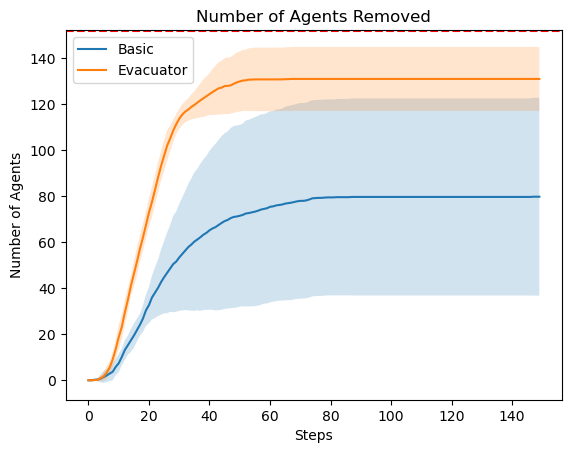

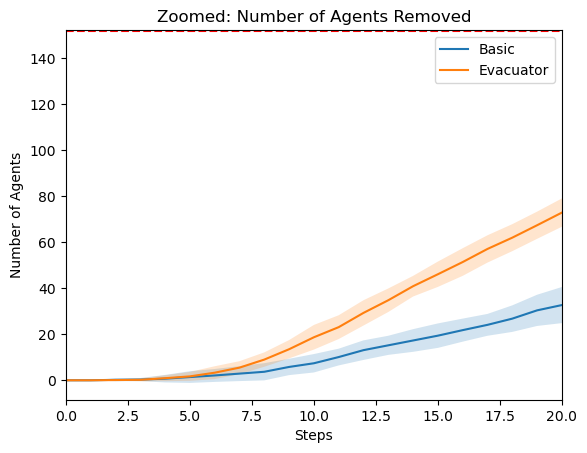

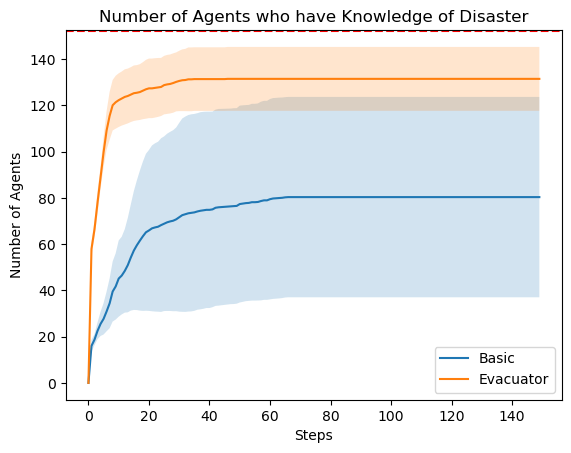

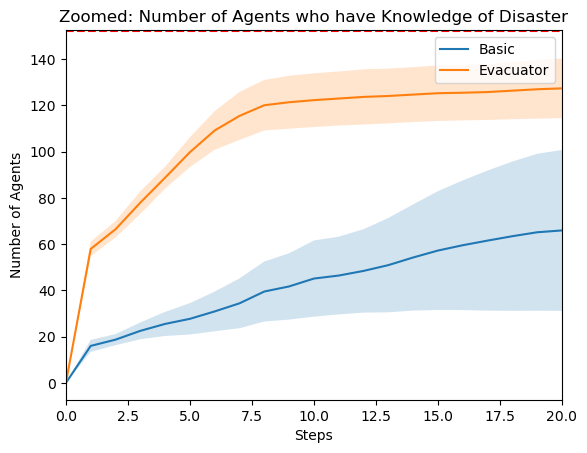

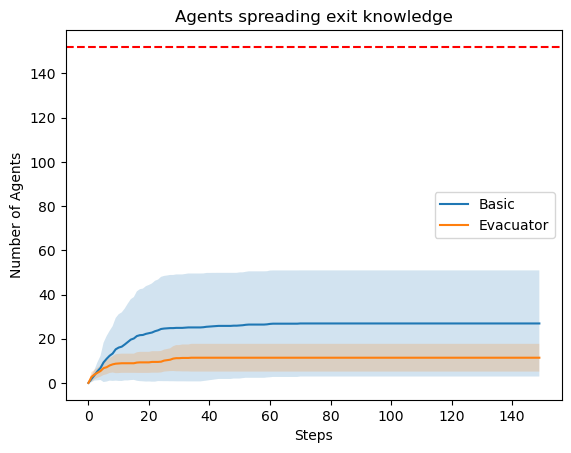

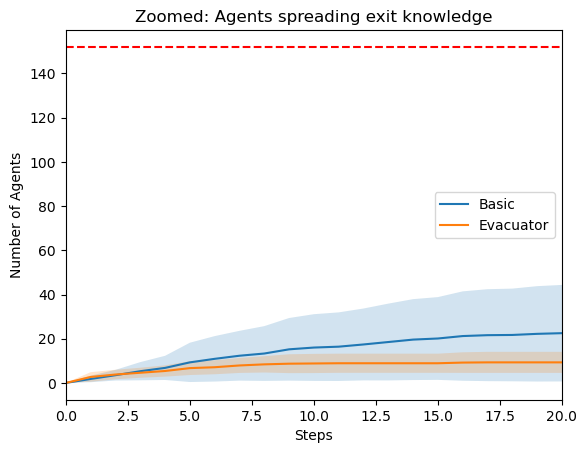

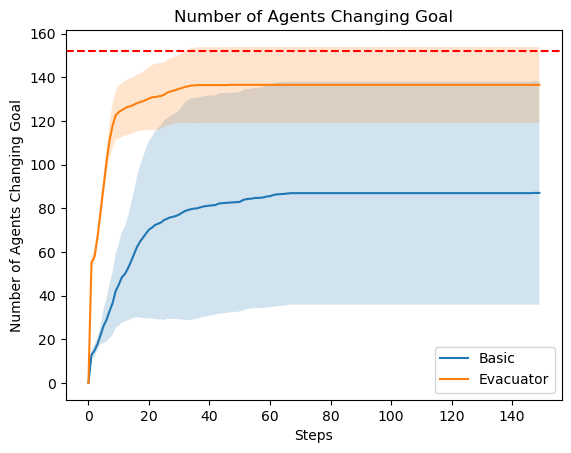

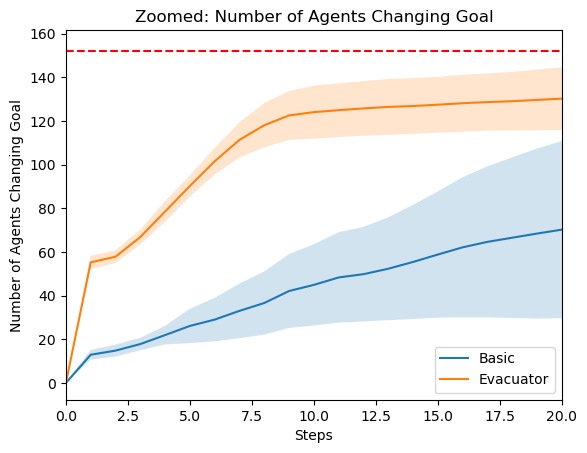

In [20]:
plot_csv("basic_removed.csv", "evacuator_removed.csv", "Basic", "Evacuator", "Number of Agents Removed")
plot_csv("basic_know_fire.csv", "evacuator_know_fire.csv", "Basic", "Evacuator", "Number of Agents who have Knowledge of Disaster")
plot_csv("basic_exit_spread.csv", "evacuator_exit_spread.csv",  "Basic", "Evacuator", "Agents spreading exit knowledge")
plot_csv("basic_change_goal.csv", "evacuator_change_goal.csv", "Basic", "Evacuator", "Number of Agents Changing Goal", "Number of Agents Changing Goal")

In [21]:
# server = ModularServer(CrowdModel, [grid], "Crowd Model", {"width": width, "height": height, "N": N, "fire_radius": fire_radius, 'social_radius': social_radius, 'p_spreading': p_spreading, 'p_spreading_environment': p_spreading_environment, 'p_env_knowledge_params': p_env_knowledge_params, 'exits': exits, 'evacuator': True})
# server.port = 9987
# server.launch()

# Plot all interventions together

In [22]:
# update the parameters fontsizes
plt.rcParams.update({'font.size': 14})

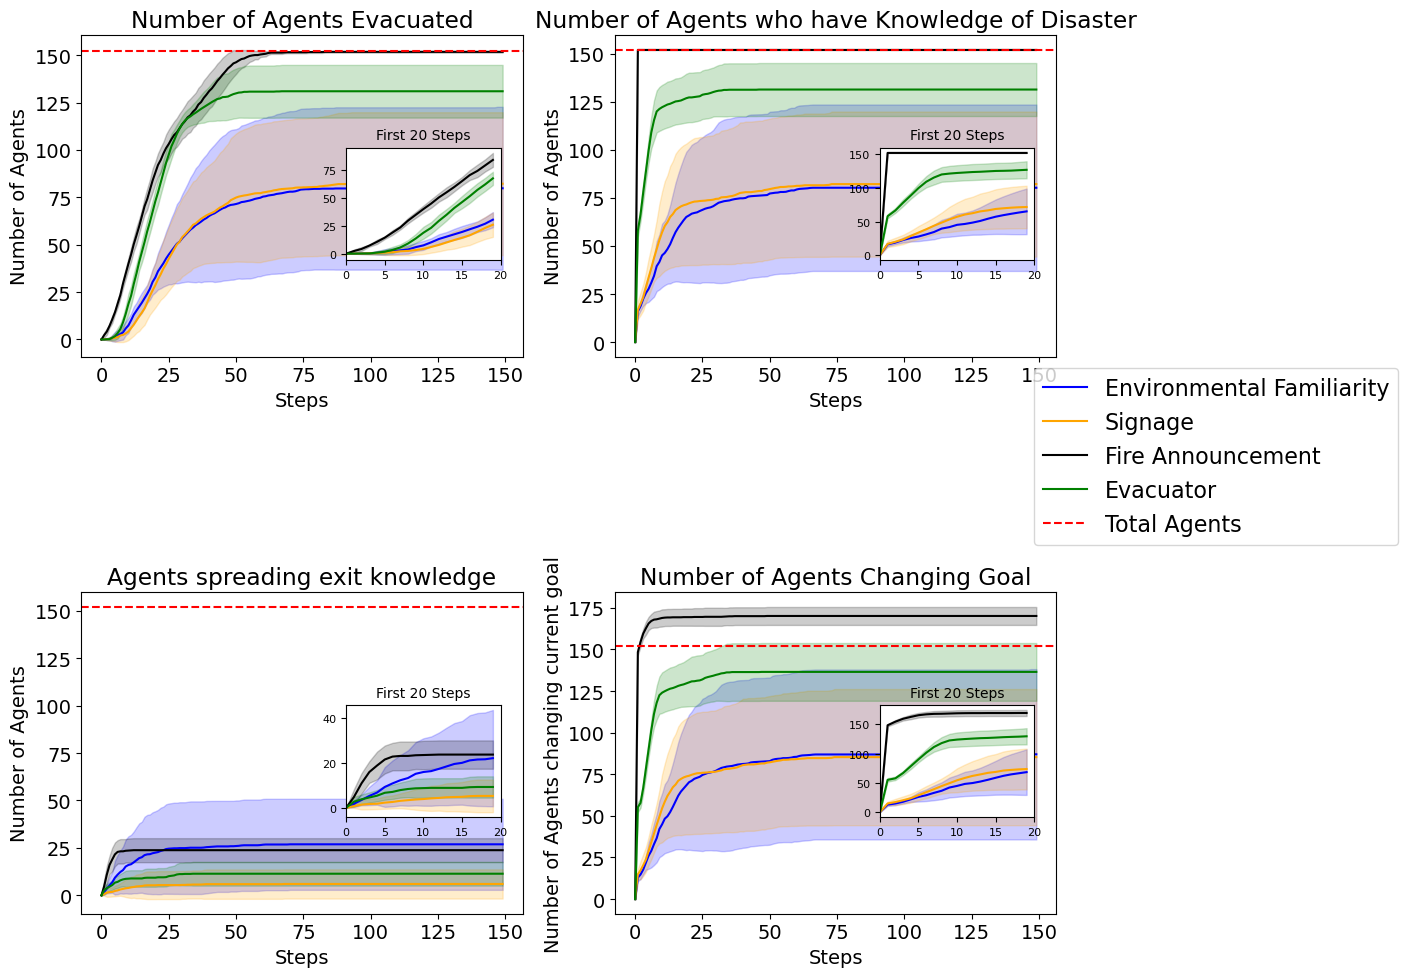

In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load data
basic_removed = pd.read_csv("basic_removed.csv")
signage_removed = pd.read_csv("signage_removed.csv")
fire_anouncement_removed = pd.read_csv("fire_anouncement_removed.csv")
evacuator_removed = pd.read_csv("evacuator_removed.csv")

basic_fire = pd.read_csv("basic_know_fire.csv")
signage_fire = pd.read_csv("signage_know_fire.csv")
fire_anouncement_fire = pd.read_csv("fire_anouncement_know_fire.csv")
evacuator_fire = pd.read_csv("evacuator_know_fire.csv")

basic_spread = pd.read_csv("basic_exit_spread.csv")
signage_spread = pd.read_csv("signage_exit_spread.csv")
fire_anouncement_spread = pd.read_csv("fire_anouncement_exit_spread.csv")
evacuator_spread = pd.read_csv("evacuator_exit_spread.csv")

basic_goal = pd.read_csv("basic_change_goal.csv")
signage_goal = pd.read_csv("signage_change_goal.csv")
fire_anouncement_goal = pd.read_csv("fire_anouncement_change_goal.csv")
evacuator_goal = pd.read_csv("evacuator_change_goal.csv")

# Create a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to add an inset plot
def add_inset(ax, data_dict):
    inset_ax = ax.inset_axes([0.6, 0.3, 0.35, 0.35])  # position of the inset axes
    for label, (data, color) in data_dict.items():
        inset_ax.plot(data.mean(axis=1)[:20], label=label, color=color)
        inset_ax.fill_between(data.index[:20], data.mean(axis=1)[:20] - data.std(axis=1)[:20], data.mean(axis=1)[:20] + data.std(axis=1)[:20], alpha=0.2, color=color)
    inset_ax.set_xlim(0, 20)
    inset_ax.set_xticks(range(0, 21, 5))
    inset_ax.set_title("First 20 Steps", fontsize=10)
    inset_ax.tick_params(axis='both', which='major', labelsize=8)

# Plot removed in one plot
axs[0, 0].plot(basic_removed.mean(axis=1), label="Basic", color = "blue")
axs[0, 0].fill_between(basic_removed.index, basic_removed.mean(axis=1) - basic_removed.std(axis=1), basic_removed.mean(axis=1) + basic_removed.std(axis=1), alpha=0.2, color = "blue")
axs[0, 0].plot(signage_removed.mean(axis=1), label="Signage", color='orange')
axs[0, 0].fill_between(signage_removed.index, signage_removed.mean(axis=1) - signage_removed.std(axis=1), signage_removed.mean(axis=1) + signage_removed.std(axis=1), alpha=0.2, color='orange')
axs[0, 0].plot(fire_anouncement_removed.mean(axis=1), label="Fire Announcement", color='black')
axs[0, 0].fill_between(fire_anouncement_removed.index, fire_anouncement_removed.mean(axis=1) - fire_anouncement_removed.std(axis=1), fire_anouncement_removed.mean(axis=1) + fire_anouncement_removed.std(axis=1), alpha=0.2, color='black')
axs[0, 0].plot(evacuator_removed.mean(axis=1), label="Evacuator", color='green')
axs[0, 0].fill_between(evacuator_removed.index, evacuator_removed.mean(axis=1) - evacuator_removed.std(axis=1), evacuator_removed.mean(axis=1) + evacuator_removed.std(axis=1), alpha=0.2, color='green')
axs[0, 0].axhline(y=(N-4), color='r', linestyle='--')
# Add inset plot for removed
data_dict = { "Basic": (basic_removed, 'blue'), "Signage": (signage_removed, 'orange'), "Fire Announcement": (fire_anouncement_removed, 'black'), "Evacuator": (evacuator_removed, 'green')}
add_inset(axs[0, 0], data_dict)
axs[0, 0].set_title("Number of Agents Evacuated")
axs[0, 0].set_xlabel("Steps")
axs[0, 0].set_ylabel("Number of Agents")

# Plot fire in one plot
axs[0, 1].plot(basic_fire.mean(axis=1), label="Environmental Familiarity", color='blue')
axs[0, 1].fill_between(basic_fire.index, basic_fire.mean(axis=1) - basic_fire.std(axis=1), basic_fire.mean(axis=1) + basic_fire.std(axis=1), alpha=0.2, color='blue')
axs[0, 1].plot(signage_fire.mean(axis=1), label="Signage", color='orange')
axs[0, 1].fill_between(signage_fire.index, signage_fire.mean(axis=1) - signage_fire.std(axis=1), signage_fire.mean(axis=1) + signage_fire.std(axis=1), alpha=0.2, color='orange')
axs[0, 1].plot(fire_anouncement_fire.mean(axis=1), label="Fire Announcement", color='black')
axs[0, 1].fill_between(fire_anouncement_fire.index, fire_anouncement_fire.mean(axis=1) - fire_anouncement_fire.std(axis=1), fire_anouncement_fire.mean(axis=1) + fire_anouncement_fire.std(axis=1), alpha=0.2, color='black')
axs[0, 1].plot(evacuator_fire.mean(axis=1), label="Evacuator", color='green')
axs[0, 1].fill_between(evacuator_fire.index, evacuator_fire.mean(axis=1) - evacuator_fire.std(axis=1), evacuator_fire.mean(axis=1) + evacuator_fire.std(axis=1), alpha=0.2, color='green')
axs[0, 1].axhline(y=(N-4), color='r', linestyle='--', label="Total Agents")
# Add inset plot for fire
data_dict = { "Basic": (basic_fire, 'blue'), "Signage": (signage_fire, 'orange'), "Fire Announcement": (fire_anouncement_fire, 'black'), "Evacuator": (evacuator_fire, 'green')}
add_inset(axs[0, 1], data_dict)
axs[0, 1].legend(bbox_to_anchor=(1.8, 0), fontsize=16)
axs[0, 1].set_title("Number of Agents who have Knowledge of Disaster")
axs[0, 1].set_xlabel("Steps")
axs[0, 1].set_ylabel("Number of Agents")

# Plot spread in one plot
axs[1, 0].plot(basic_spread.mean(axis=1), label="Basic", color='blue')
axs[1, 0].fill_between(basic_spread.index, basic_spread.mean(axis=1) - basic_spread.std(axis=1), basic_spread.mean(axis=1) + basic_spread.std(axis=1), alpha=0.2, color='blue')
axs[1, 0].plot(signage_spread.mean(axis=1), label="Signage", color='orange')
axs[1, 0].fill_between(signage_spread.index, signage_spread.mean(axis=1) - signage_spread.std(axis=1), signage_spread.mean(axis=1) + signage_spread.std(axis=1), alpha=0.2, color='orange')
axs[1, 0].plot(fire_anouncement_spread.mean(axis=1), label="Fire Announcement", color='black')
axs[1, 0].fill_between(fire_anouncement_spread.index, fire_anouncement_spread.mean(axis=1) - fire_anouncement_spread.std(axis=1), fire_anouncement_spread.mean(axis=1) + fire_anouncement_spread.std(axis=1), alpha=0.2, color='black')
axs[1, 0].plot(evacuator_spread.mean(axis=1), label="Evacuator", color='green')
axs[1, 0].fill_between(evacuator_spread.index, evacuator_spread.mean(axis=1) - evacuator_spread.std(axis=1), evacuator_spread.mean(axis=1) + evacuator_spread.std(axis=1), alpha=0.2, color='green')
axs[1, 0].axhline(y=(N-4), color='r', linestyle='--')
# Add inset plot for spread
data_dict = { "Basic": (basic_spread, 'blue'), "Signage": (signage_spread, 'orange'), "Fire Announcement": (fire_anouncement_spread, 'black'), "Evacuator": (evacuator_spread, 'green')}
add_inset(axs[1, 0], data_dict)
axs[1, 0].set_title("Agents spreading exit knowledge")
axs[1, 0].set_xlabel("Steps")
axs[1, 0].set_ylabel("Number of Agents")

# Plot goal in one plot
axs[1, 1].plot(basic_goal.mean(axis=1), label="Basic", color='blue')
axs[1, 1].fill_between(basic_goal.index, basic_goal.mean(axis=1) - basic_goal.std(axis=1), basic_goal.mean(axis=1) + basic_goal.std(axis=1), alpha=0.2, color='blue')
axs[1, 1].plot(signage_goal.mean(axis=1), label="Signage", color='orange')
axs[1, 1].fill_between(signage_goal.index, signage_goal.mean(axis=1) - signage_goal.std(axis=1), signage_goal.mean(axis=1) + signage_goal.std(axis=1), alpha=0.2,  color='orange')
axs[1, 1].plot(fire_anouncement_goal.mean(axis=1), label="Fire Announcement", color='black')
axs[1, 1].fill_between(fire_anouncement_goal.index, fire_anouncement_goal.mean(axis=1) - fire_anouncement_goal.std(axis=1), fire_anouncement_goal.mean(axis=1) + fire_anouncement_goal.std(axis=1), alpha=0.2, color='black')
axs[1, 1].plot(evacuator_goal.mean(axis=1), label="Evacuator", color='green')
axs[1, 1].fill_between(evacuator_goal.index, evacuator_goal.mean(axis=1) - evacuator_goal.std(axis=1), evacuator_goal.mean(axis=1) + evacuator_goal.std(axis=1), alpha=0.2, color='green')
axs[1, 1].axhline(y=(N-4), color='r', linestyle='--')
# Add inset plot for goal
data_dict = { "Basic": (basic_goal, 'blue'), "Signage": (signage_goal, 'orange'), "Fire Announcement": (fire_anouncement_goal, 'black'), "Evacuator": (evacuator_goal, 'green')}
add_inset(axs[1, 1], data_dict)
axs[1, 1].set_title("Number of Agents Changing Goal")
axs[1, 1].set_xlabel("Steps")
axs[1, 1].set_ylabel("Number of Agents changing current goal")

plt.tight_layout()
plt.show()
